In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import copy

font_location = 'C:/Windows/Fonts/SeoulNamsanEB.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [2]:
age1902= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_AGE_201902.CSV', sep = '|')
age1903= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_AGE_201903.CSV', sep = '|')
age1904= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_AGE_201904.CSV', sep = '|')
age1905= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_AGE_201905.CSV', sep = '|')
age2002= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_AGE_202002.CSV', sep = '|')
age2003= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_AGE_202003.CSV', sep = '|')
age2004= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_AGE_202004.CSV', sep = '|')
age2005= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_AGE_202005.CSV', sep = '|')

In [3]:
df_19 = pd.concat([age1902, age1903, age1904, age1905], axis=0)
df_20 = pd.concat([age2002, age2003, age2004, age2005], axis=0)

In [4]:
# 날짜 형식 변환
df_19['STD_YMD'] = pd.to_datetime(df_19['STD_YMD'].astype(str))
df_20['STD_YMD'] = pd.to_datetime(df_20['STD_YMD'].astype(str))

In [5]:
#요일 생성
df_19['day'] = df_19['STD_YMD'].dt.day_name()
df_20['day'] = df_20['STD_YMD'].dt.day_name()

In [6]:
#주말 데이터 생성
df_1 = pd.concat([df_19[df_19['day'] == 'Sunday'], df_19[df_19['day'] == 'Saturday']])
df_2 = pd.concat([df_20[df_20['day'] == 'Sunday'], df_20[df_20['day'] == 'Saturday']])

In [7]:
df_ = pd.read_excel(r'C:\Users\sb\TIL\TIL\빅콘\버스\4개지역_행정동.xlsx')
df_ = df_[['HDONG_NM', 'SIDO_NM', 'SGNG_NM']]
df_.set_index('HDONG_NM', inplace=True)

In [8]:
#시, 도 맵핑
def make_SIDO(df):
    try:       
        df.set_index('HDONG_NM', inplace=True)
        df['SIDO_NM'] = 0
        df['SGNG_NM'] = 0
        for dong in df.index.unique():
                df['SIDO_NM'][dong] = df_.loc[dong]['SIDO_NM']
                df['SGNG_NM'][dong] = df_.loc[dong]['SGNG_NM']
        return df 
    except:
            print(dong)

In [9]:
df_19 = make_SIDO(df_19)
df_20 = make_SIDO(df_20)
df_1 = make_SIDO(df_1)
df_2 = make_SIDO(df_2)

C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
#연령별 칼럼
col_10 = ['MAN_FLOW_POP_CNT_1014','MAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_1014', 'WMAN_FLOW_POP_CNT_1519']
col_20 = ['MAN_FLOW_POP_CNT_2024','MAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_2024', 'WMAN_FLOW_POP_CNT_2529']
col_30 = ['MAN_FLOW_POP_CNT_3034','MAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_3034', 'WMAN_FLOW_POP_CNT_3539']
col_40 = ['MAN_FLOW_POP_CNT_4044','MAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_4044', 'WMAN_FLOW_POP_CNT_4549']
col_50 = ['MAN_FLOW_POP_CNT_5054','MAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_5054', 'WMAN_FLOW_POP_CNT_5559']

In [11]:
df_19 = df_19[df_19['SIDO_NM'] == '서울특별시']
df_20 = df_20[df_20['SIDO_NM'] == '서울특별시']
df_1 = df_1[df_1['SIDO_NM'] == '서울특별시']
df_2 = df_2[df_2['SIDO_NM'] == '서울특별시']

In [12]:
df_1['all_10'] = df_1[col_10].sum(axis=1)
df_1['all_20'] = df_1[col_20].sum(axis=1)
df_1['all_30'] = df_1[col_30].sum(axis=1)
df_1['all_40'] = df_1[col_40].sum(axis=1)
df_1['all_50'] = df_1[col_50].sum(axis=1)

In [13]:
df_2['all_10'] = df_2[col_10].sum(axis=1)
df_2['all_20'] = df_2[col_20].sum(axis=1)
df_2['all_30'] = df_2[col_30].sum(axis=1)
df_2['all_40'] = df_2[col_40].sum(axis=1)
df_2['all_50'] = df_2[col_50].sum(axis=1)

In [14]:
df_19['all_10'] = df_19[col_10].sum(axis=1)
df_19['all_20'] = df_19[col_20].sum(axis=1)
df_19['all_30'] = df_19[col_30].sum(axis=1)
df_19['all_40'] = df_19[col_40].sum(axis=1)
df_19['all_50'] = df_19[col_50].sum(axis=1)

In [15]:
df_20['all_10'] = df_20[col_10].sum(axis=1)
df_20['all_20'] = df_20[col_20].sum(axis=1)
df_20['all_30'] = df_20[col_30].sum(axis=1)
df_20['all_40'] = df_20[col_40].sum(axis=1)
df_20['all_50'] = df_20[col_50].sum(axis=1)

In [ ]:
all_col = ['all_10', 'all_20', 'all_30', 'all_40', 'all_50']

# 전년 동월대비 증감율
# 지난달 대비 증감율

In [118]:
temp = df_20.groupby(['STD_YM', 'HDONG_NM']).sum()

In [119]:
temp_2 = copy.deepcopy(temp)

# 이전월 대비 증감율

## 주중 + 주말

In [120]:
for month in df_20['STD_YM'].unique():
    for dong in df_20['HDONG_NM']:
        if month == 202002:
            temp.loc[month].loc[dong] = 0
        elif month == 202003:
            temp.loc[month].loc[dong] = (temp_2.loc[month].loc[dong] - temp_2.loc[202002].loc[dong]) / temp_2.loc[202002].loc[dong] * 100
        elif month == 202004:
            temp.loc[month].loc[dong] = (temp_2.loc[month].loc[dong] - temp_2.loc[202003].loc[dong]) / temp_2.loc[202003].loc[dong] * 100 
        elif month == 202005:
            temp.loc[month].loc[dong] = (temp_2.loc[month].loc[dong] - temp_2.loc[202004].loc[dong]) / temp_2.loc[202004].loc[dong] * 100

C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
temp.reset_index(inplace=True)

In [26]:
temp = make_SIDO(temp)

C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
temp.reset_index(inplace=True)

# 중구, 노원 전체 요일 연령 전월 대비

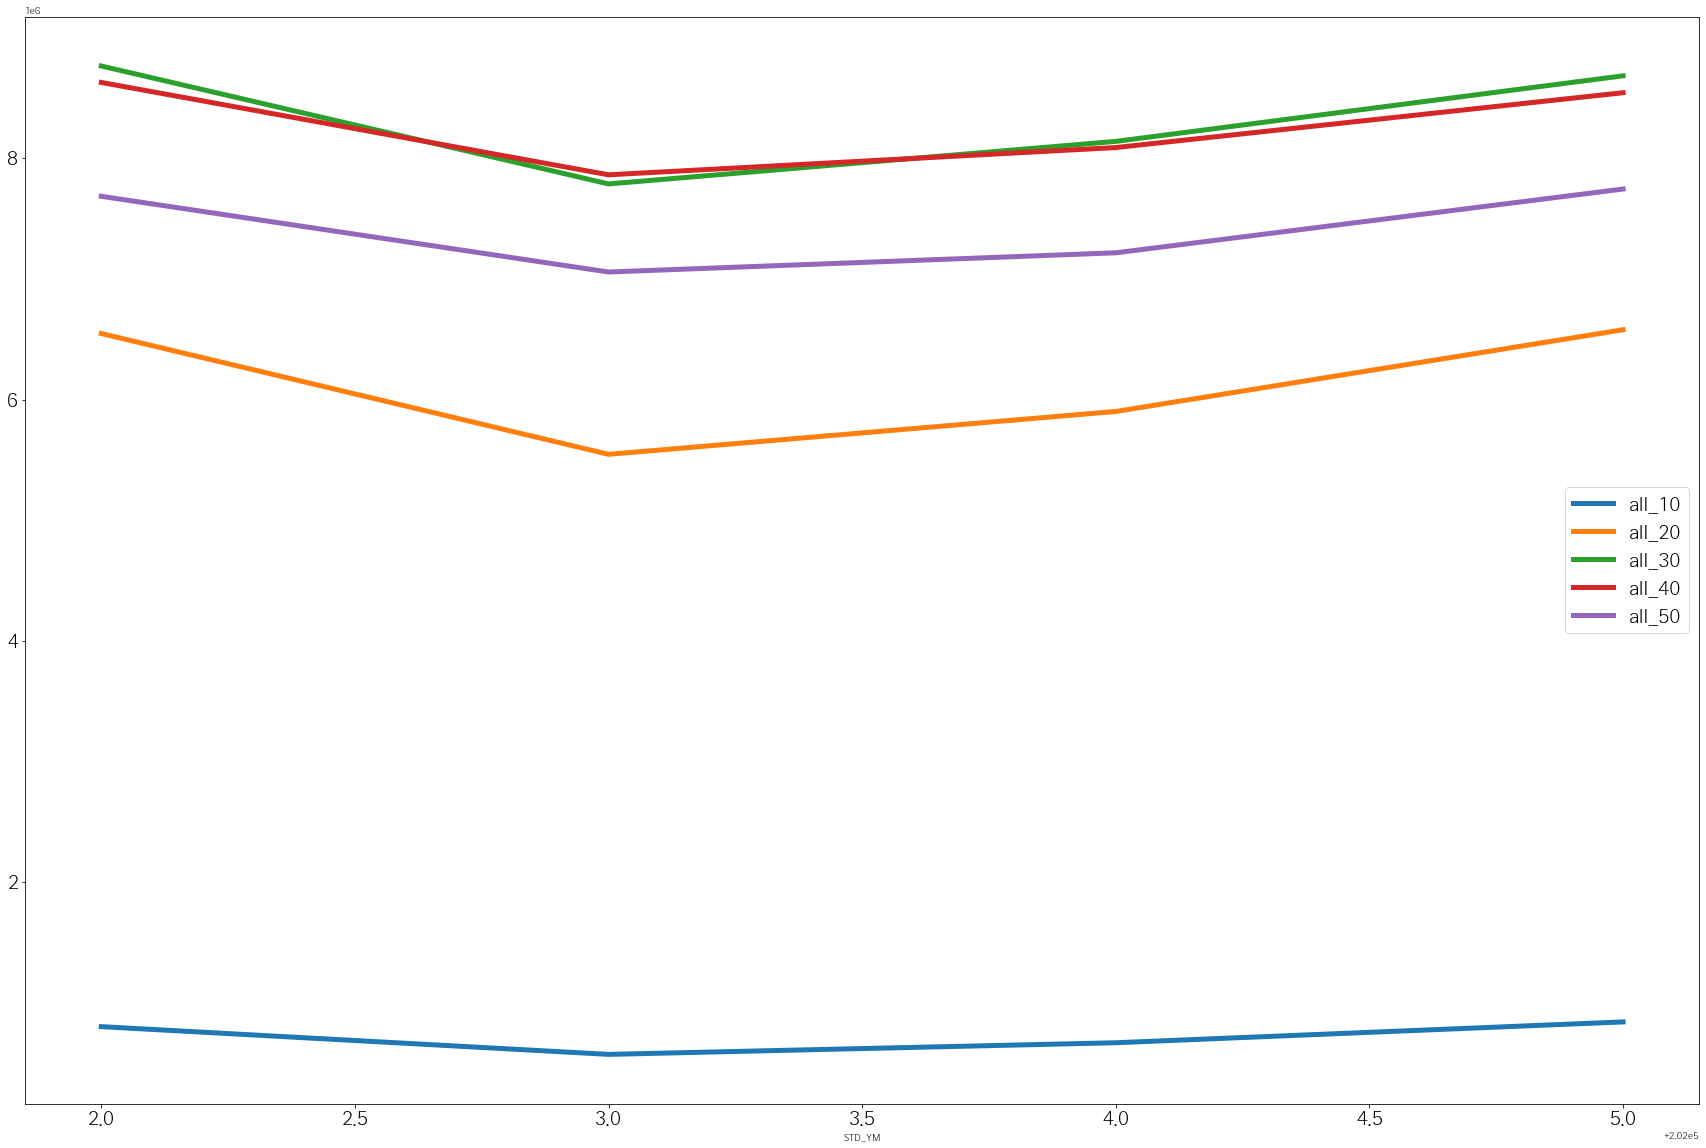

In [28]:
temp[temp['SGNG_NM'] == '중구'].groupby('STD_YM')[['all_10', 'all_20', 'all_30', 'all_40', 'all_50']].sum().plot(figsize=(30,20), fontsize=20, linewidth=5, )
plt.legend(fontsize=20)

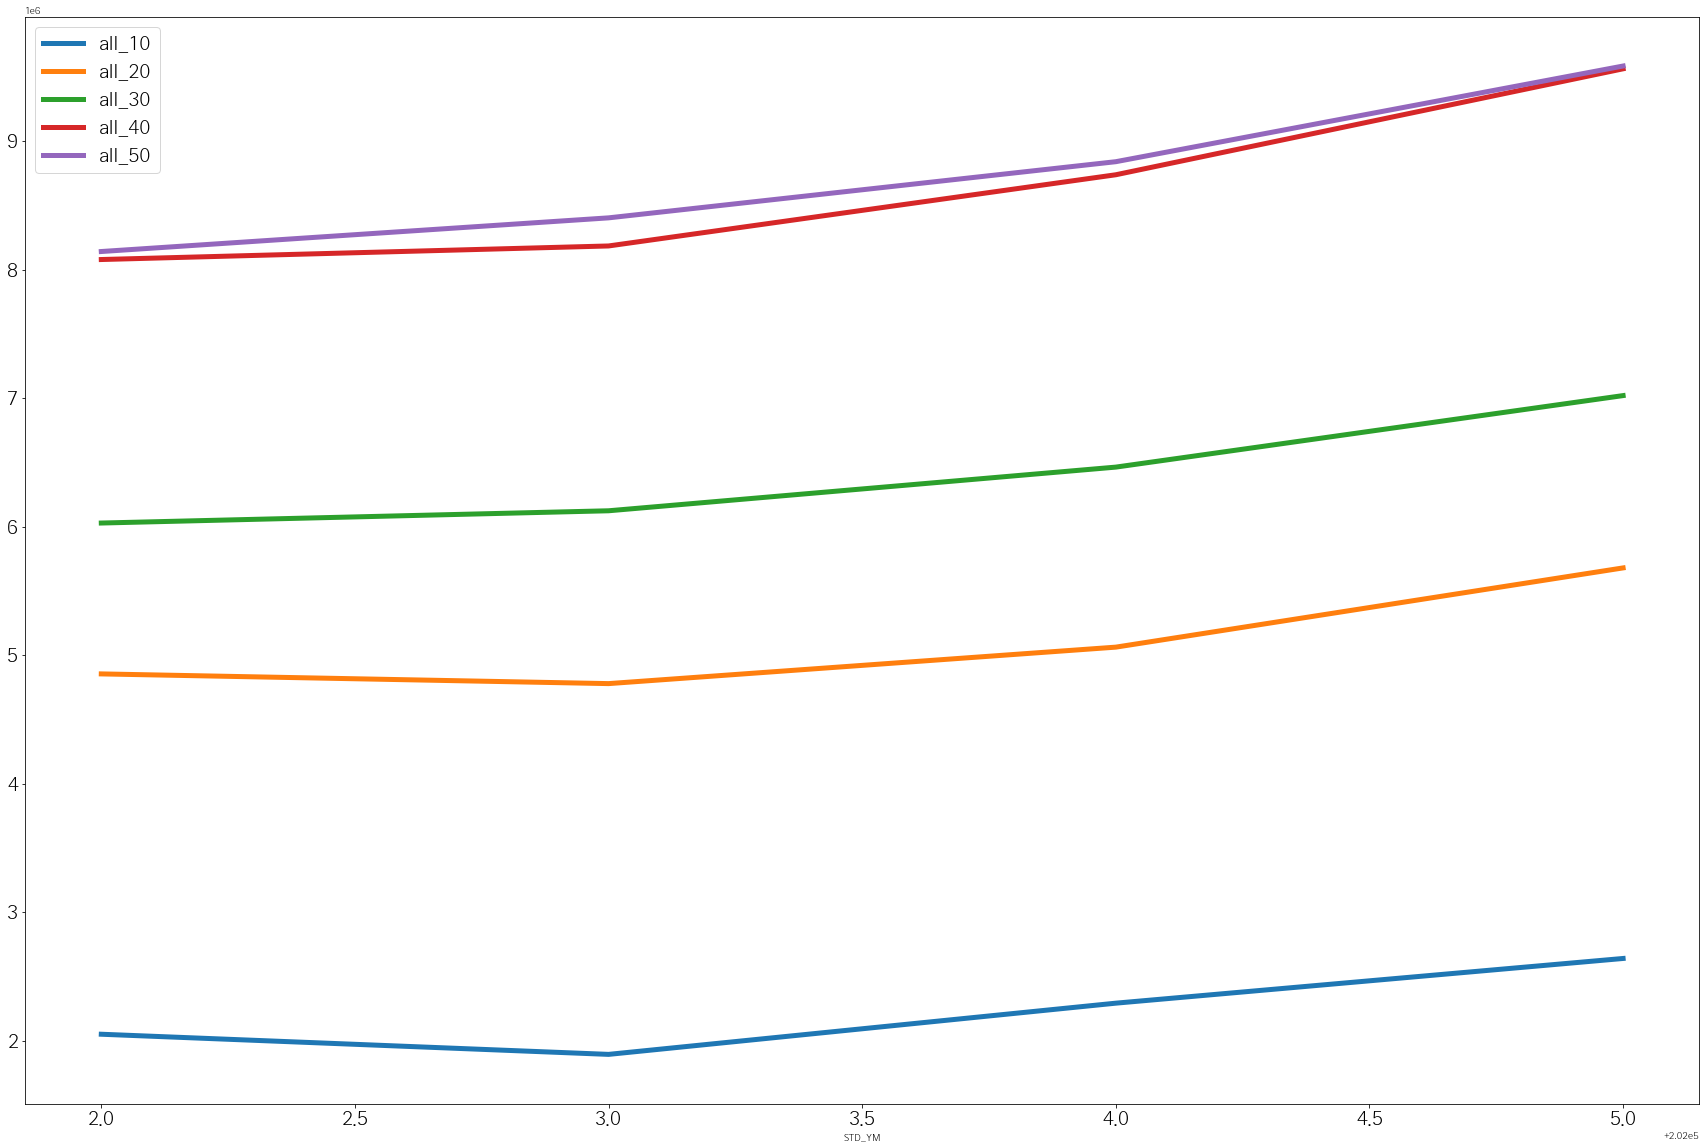

In [29]:
temp[temp['SGNG_NM'] == '노원구'].groupby('STD_YM')[['all_10', 'all_20', 'all_30', 'all_40', 'all_50']].sum().plot(figsize=(30,20), fontsize=20, linewidth=5, )
plt.legend(fontsize=20)

## 주말만

In [30]:
temp_we = df_2.groupby(['STD_YM', 'HDONG_NM']).sum()

In [31]:
temp_we_2 = copy.deepcopy(temp_we)

In [32]:
for month in df_2['STD_YM'].unique():
    for dong in df_2['HDONG_NM']:
        if month == 202002:
            temp_we.loc[month].loc[dong] = 0
        elif month == 202003:
            temp_we.loc[month].loc[dong] = (temp_we_2.loc[month].loc[dong] - temp_we_2.loc[202002].loc[dong]) / temp_we_2.loc[202002].loc[dong] * 100
        elif month == 202004:
            temp_we.loc[month].loc[dong] = (temp_we_2.loc[month].loc[dong] - temp_we_2.loc[202003].loc[dong]) / temp_we_2.loc[202003].loc[dong] * 100 
        elif month == 202005:
            temp_we.loc[month].loc[dong] = (temp_we_2.loc[month].loc[dong] - temp_we_2.loc[202004].loc[dong]) / temp_we_2.loc[202004].loc[dong] * 100

KeyError: 'HDONG_NM'

In [34]:
temp_we.reset_index(inplace=True)
temp_we = make_SIDO(temp_we)
temp_we.reset_index(inplace=True)

C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# 서울 전체 모든 연령 주말 데이터

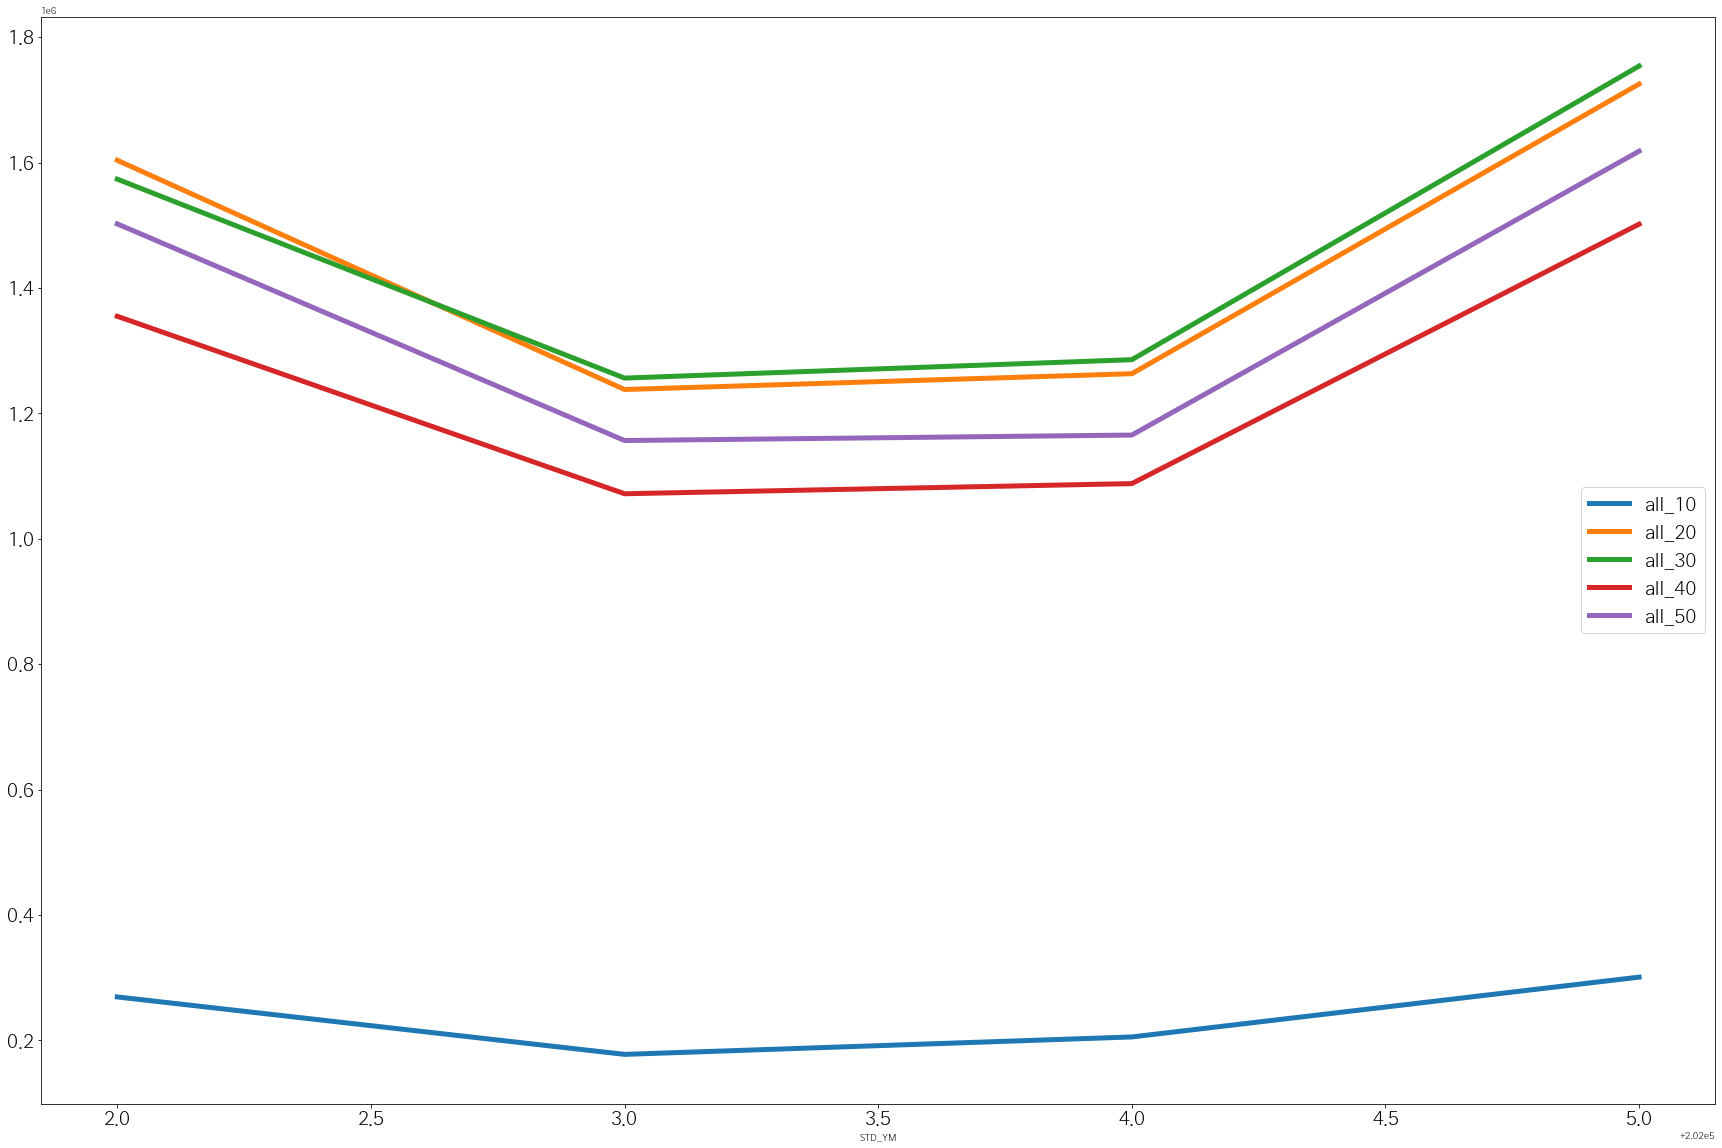

In [37]:
temp_we[temp_we['SGNG_NM'] == '중구'].groupby('STD_YM')[['all_10', 'all_20', 'all_30', 'all_40', 'all_50']].sum().plot(figsize=(30,20), fontsize=20, linewidth=5, )
plt.legend(fontsize=20)

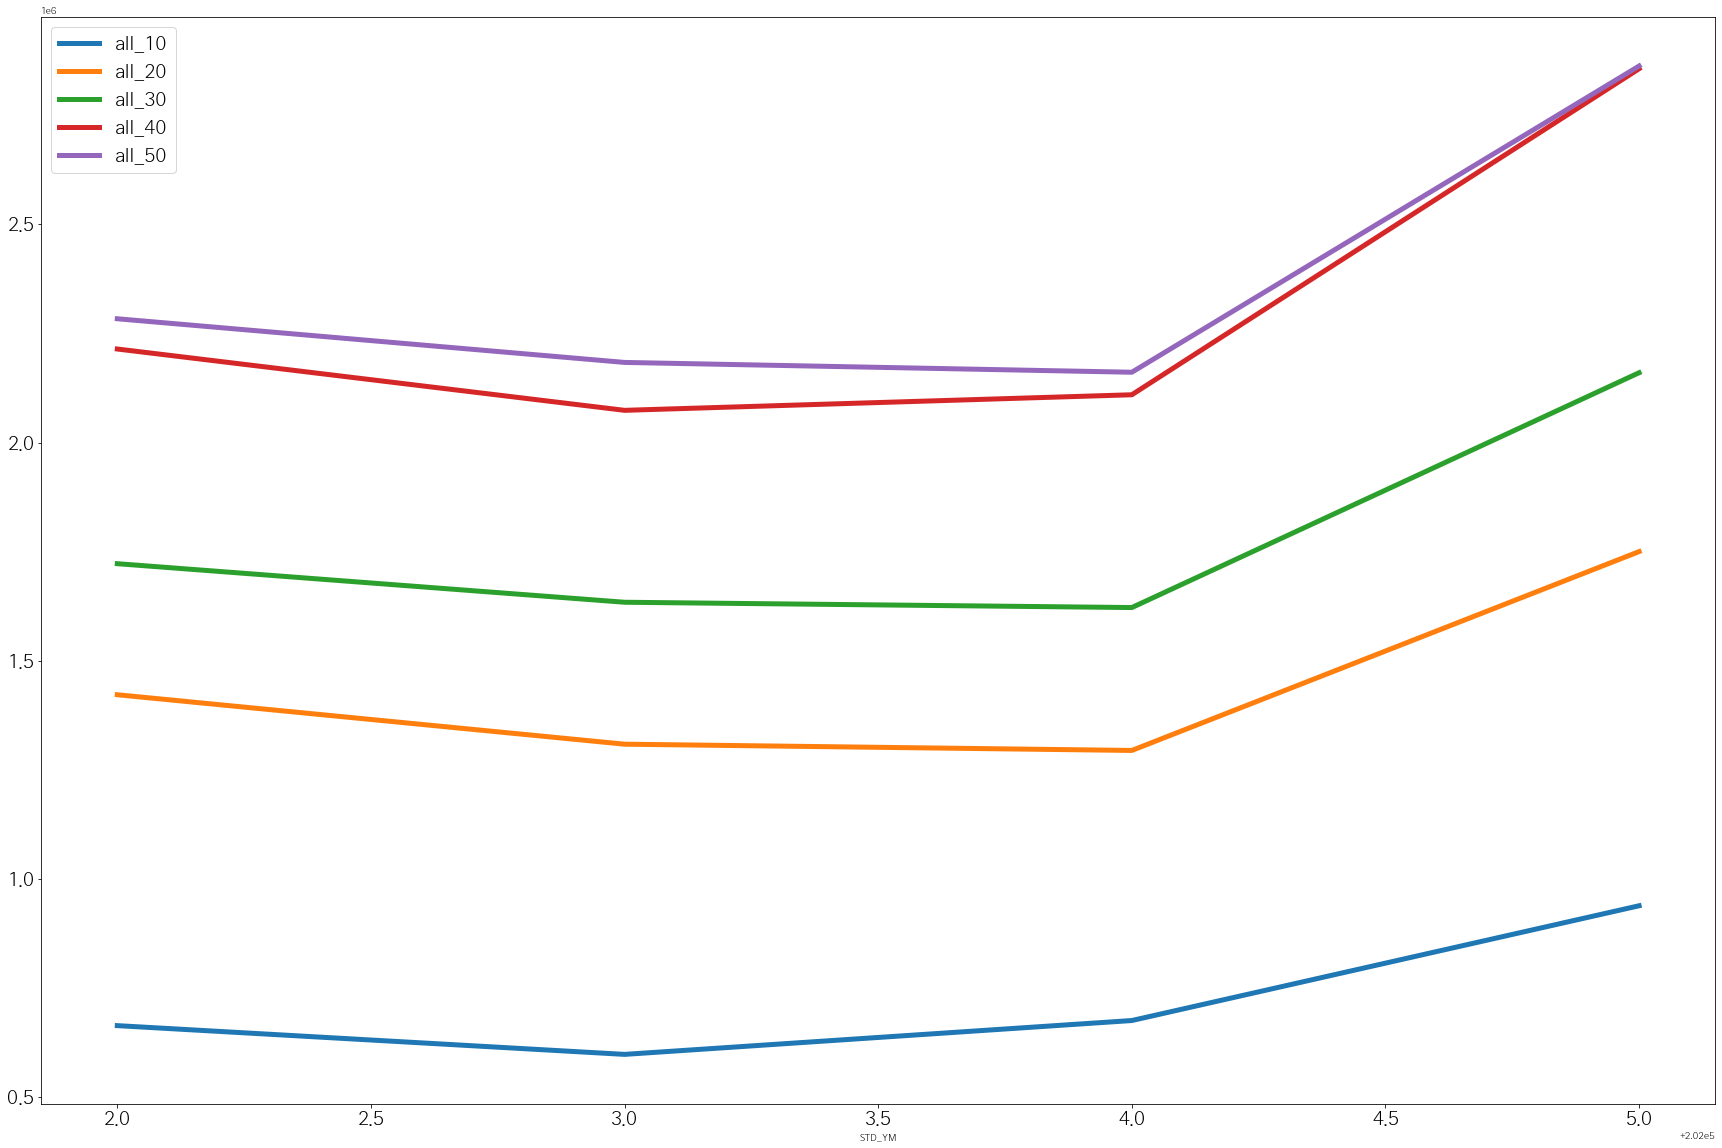

In [38]:
temp_we[temp_we['SGNG_NM'] == '노원구'].groupby('STD_YM')[['all_10', 'all_20', 'all_30', 'all_40', 'all_50']].sum().plot(figsize=(30,20), fontsize=20, linewidth=5, )
plt.legend(fontsize=20)

# 전년 동월 대비 증감량

In [39]:
df_19.reset_index(inplace=True)

In [42]:
temp_year = df_20.groupby(['STD_YM', 'HDONG_NM']).sum()

In [43]:
temp_19 = df_19.groupby(['STD_YM', 'HDONG_NM']).sum()

In [44]:
temp_20 = df_20.groupby(['STD_YM', 'HDONG_NM']).sum()

In [45]:
for month in df_20['STD_YM'].unique():
    for dong in df_20['HDONG_NM']:
        if month == 202002:
            temp_year.loc[month].loc[dong] = 0
        elif month == 202003:
            temp_year.loc[month].loc[dong] = (temp_20.loc[month].loc[dong] - temp_19.loc[201903].loc[dong]) / temp_19.loc[201903].loc[dong] * 100
        elif month == 202004:
            temp_year.loc[month].loc[dong] = (temp_20.loc[month].loc[dong] - temp_19.loc[201903].loc[dong]) / temp_19.loc[201904].loc[dong] * 100 
        elif month == 202005:
            temp_year.loc[month].loc[dong] = (temp_20.loc[month].loc[dong] - temp_19.loc[201903].loc[dong]) / temp_19.loc[201905].loc[dong] * 100

C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [46]:
temp_year.reset_index(inplace=True)

In [47]:
temp_year = make_SIDO(temp_year)
temp_year.reset_index(inplace=True)

C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface 

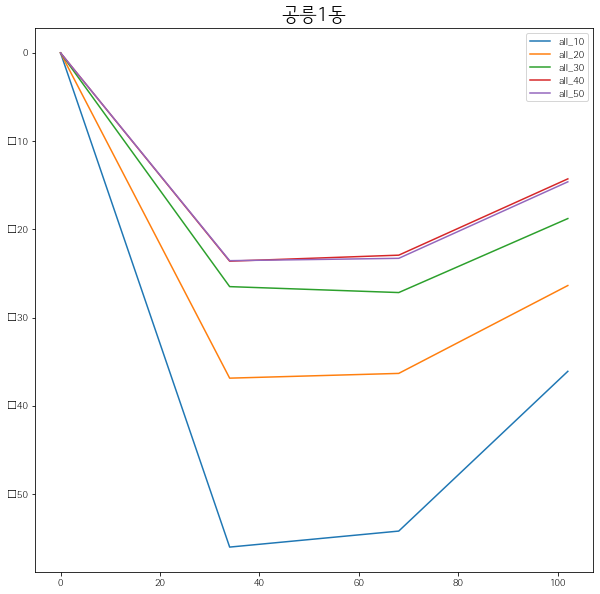

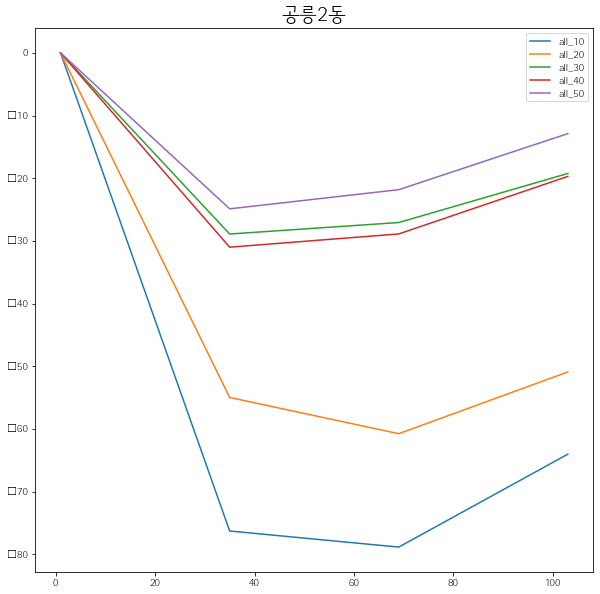

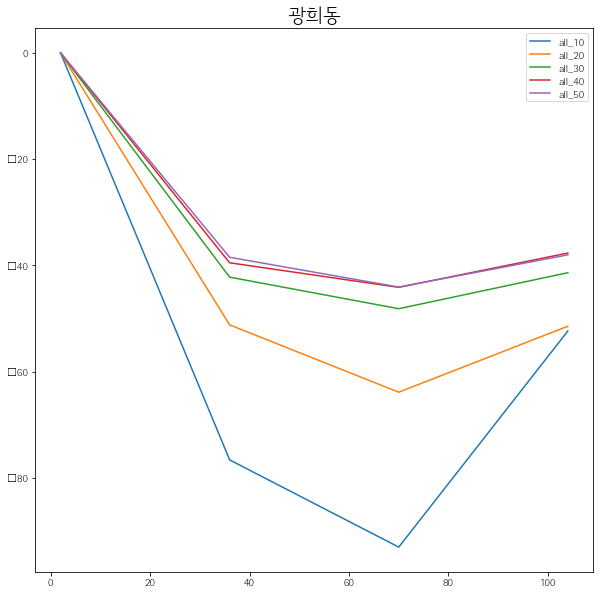

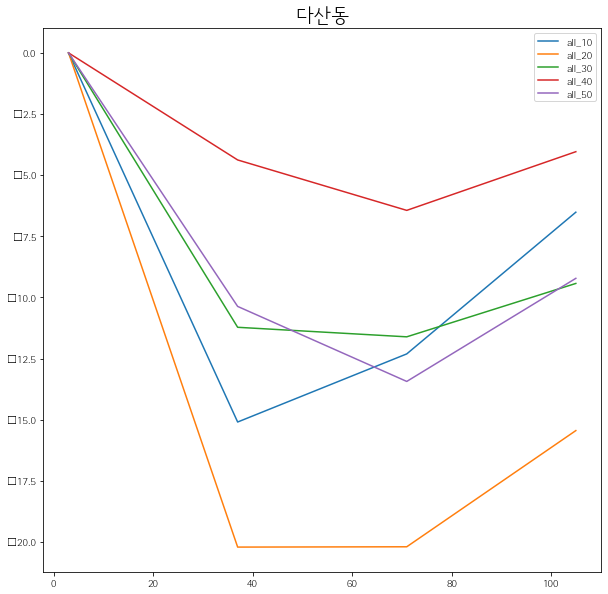

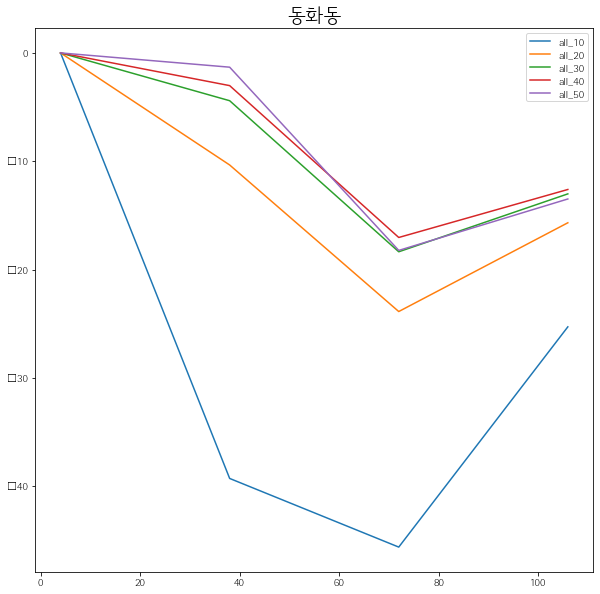

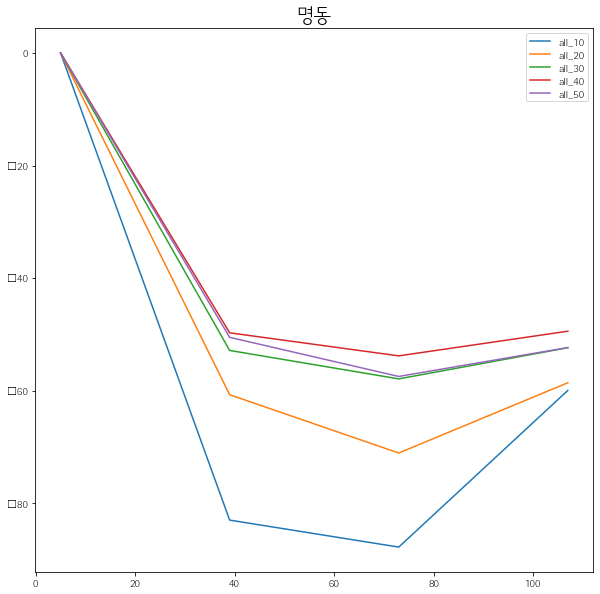

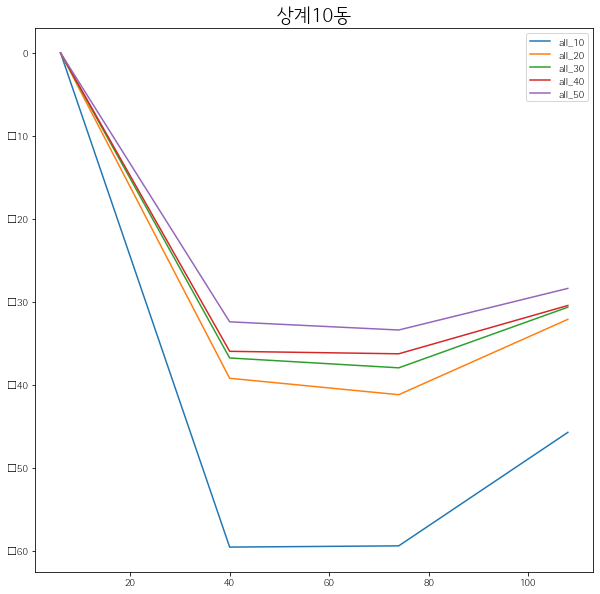

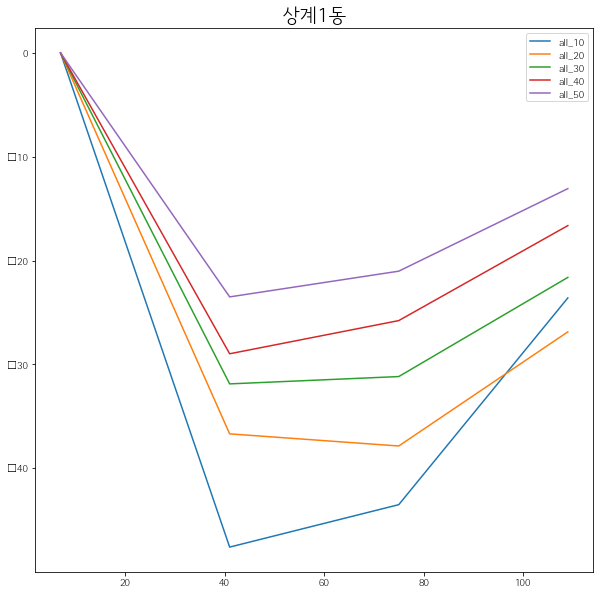

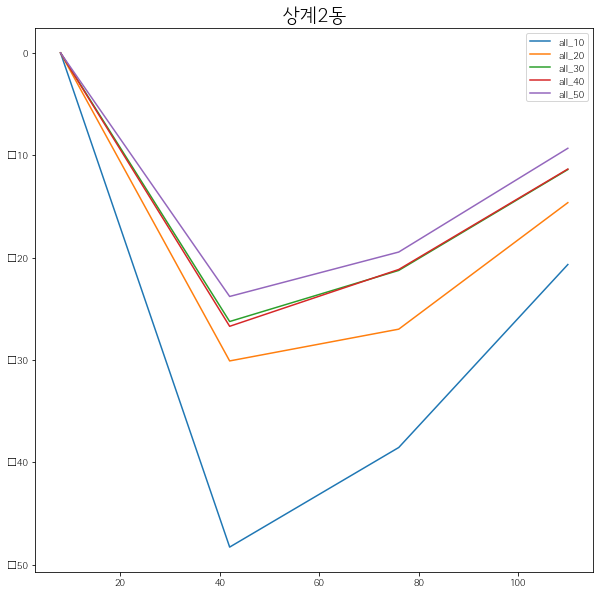

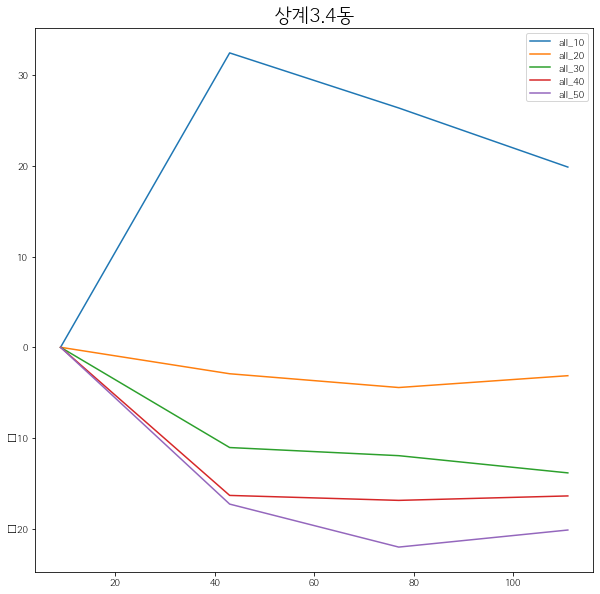

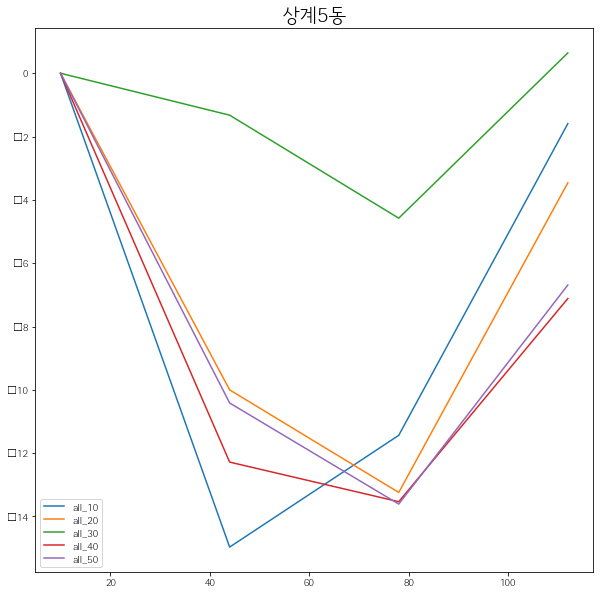

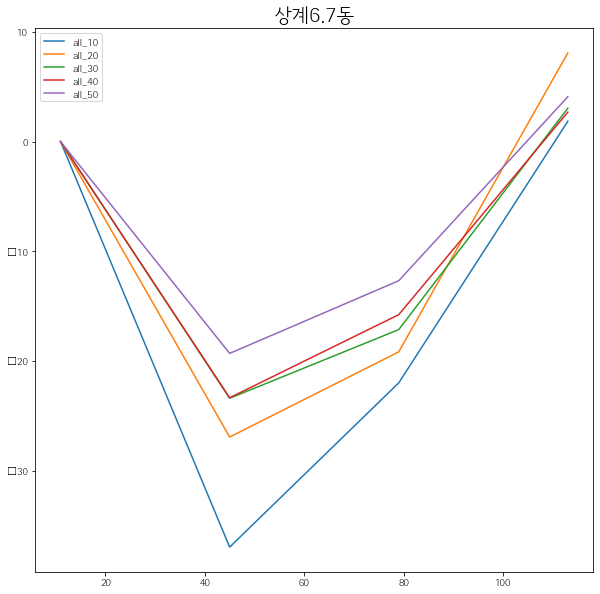

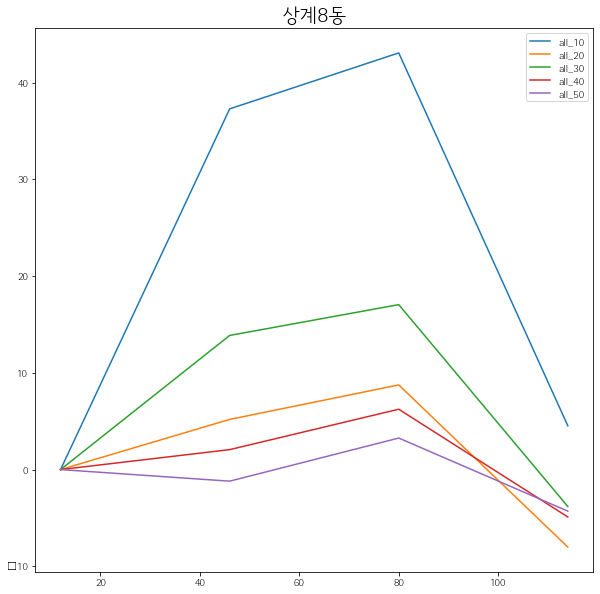

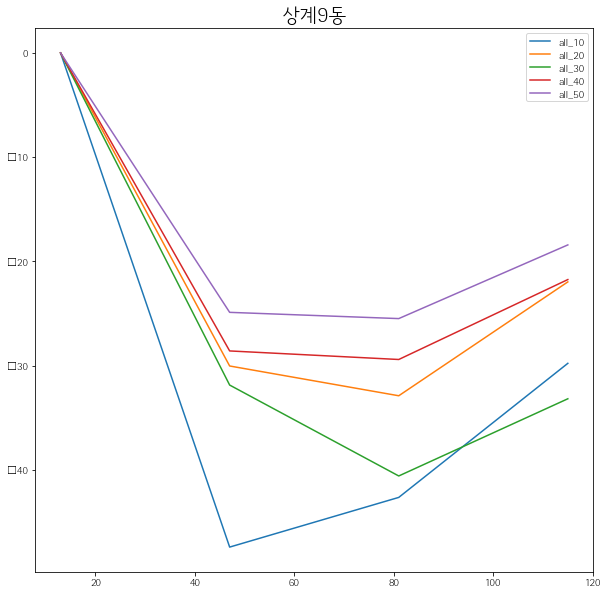

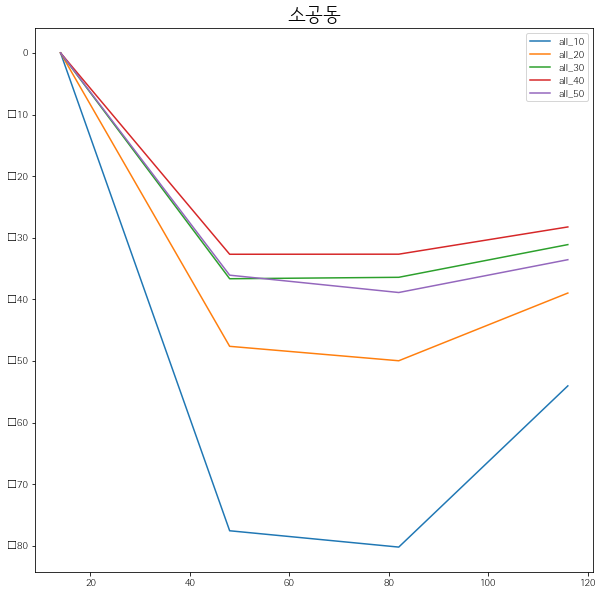

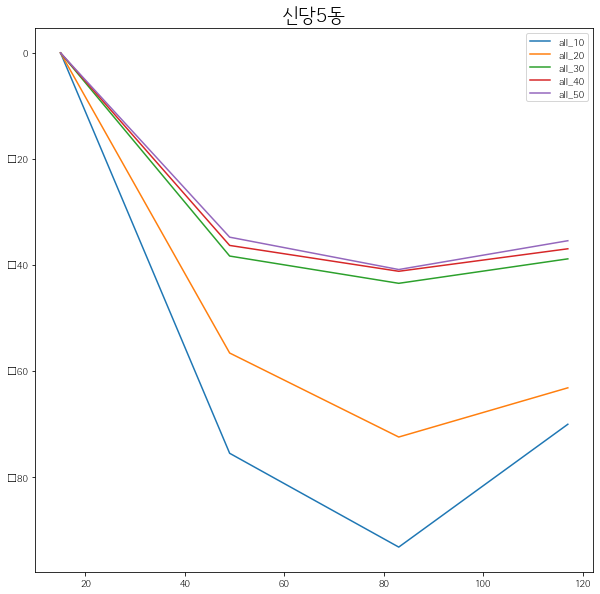

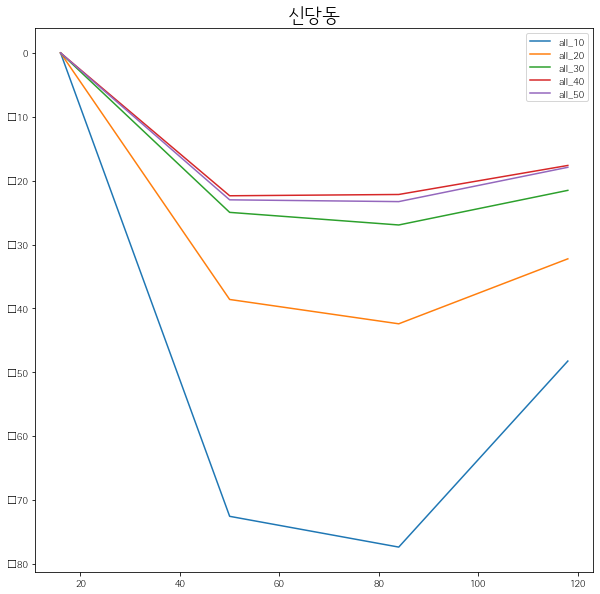

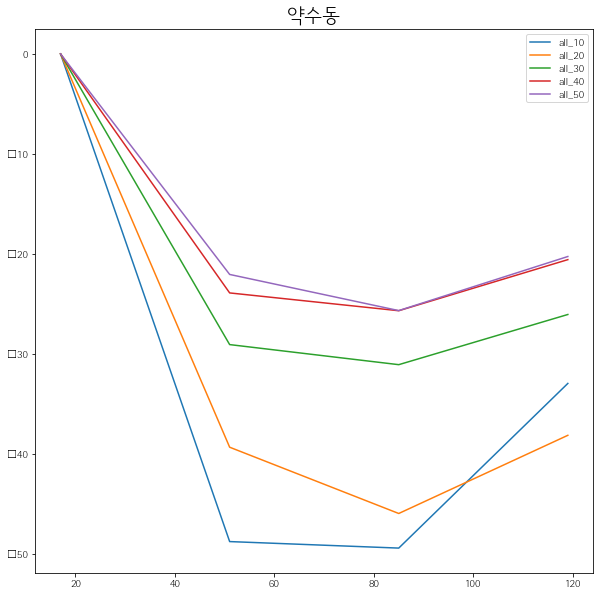

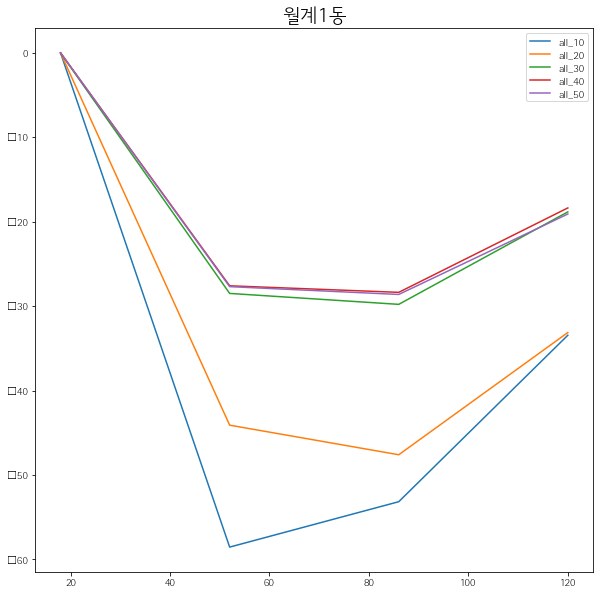

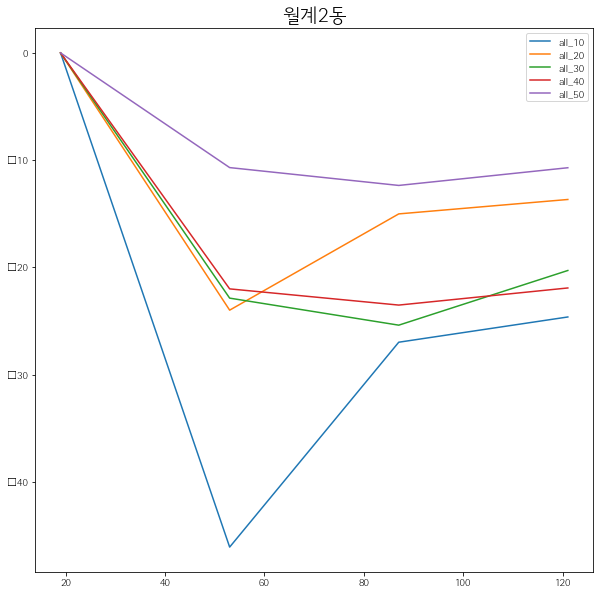

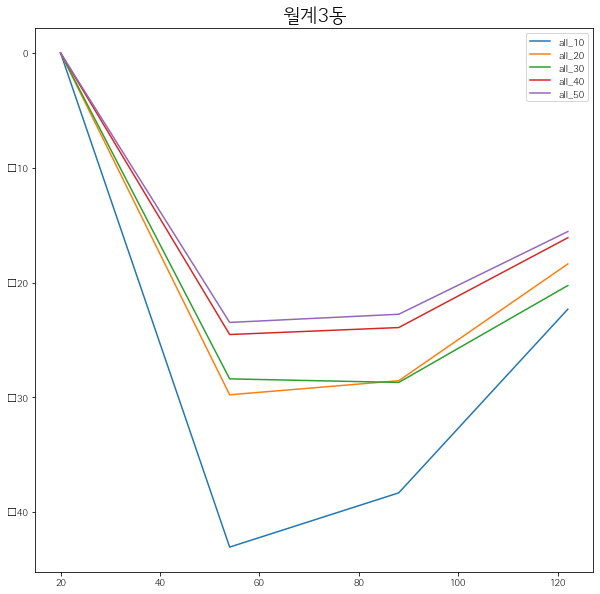

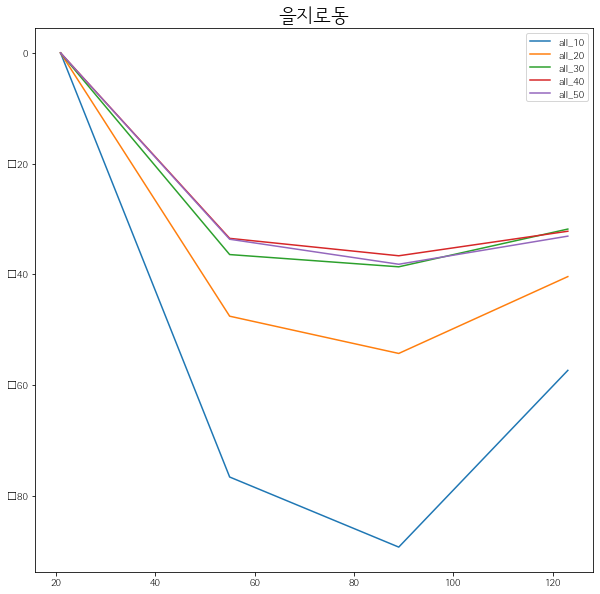

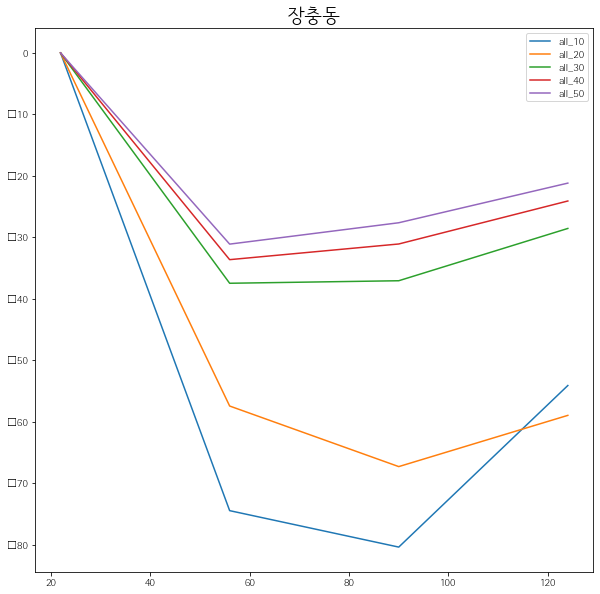

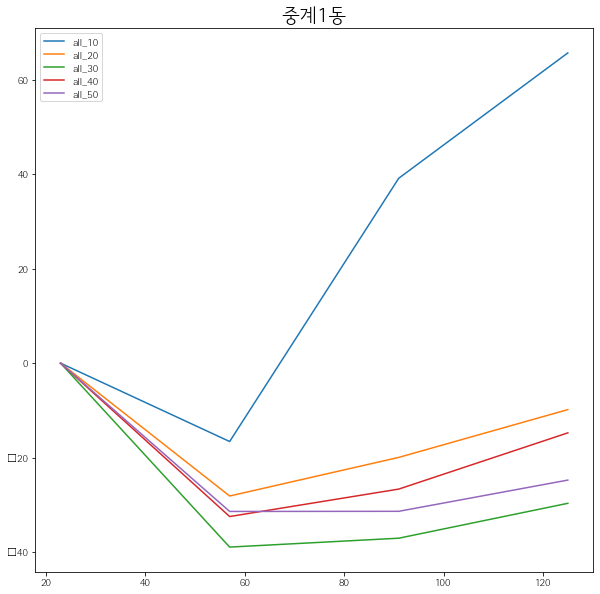

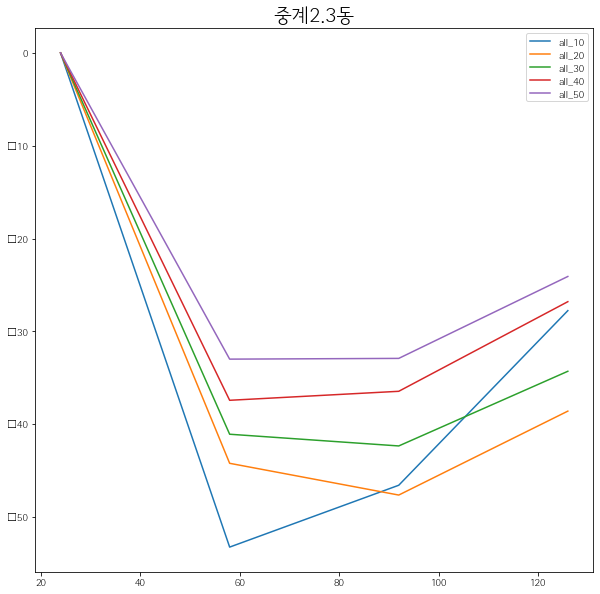

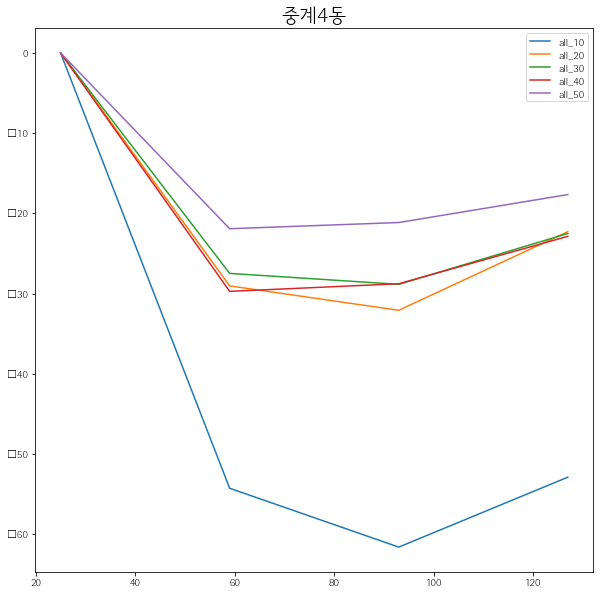

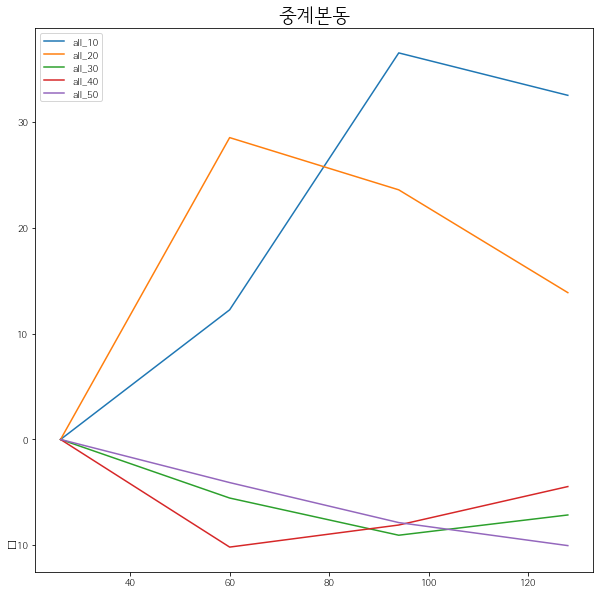

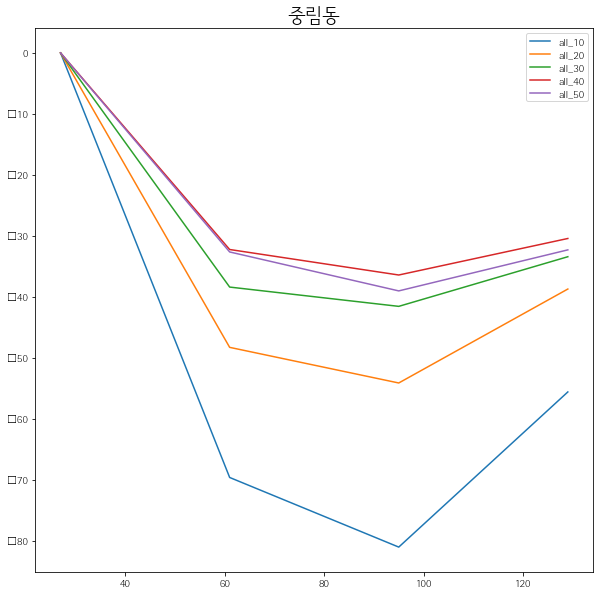

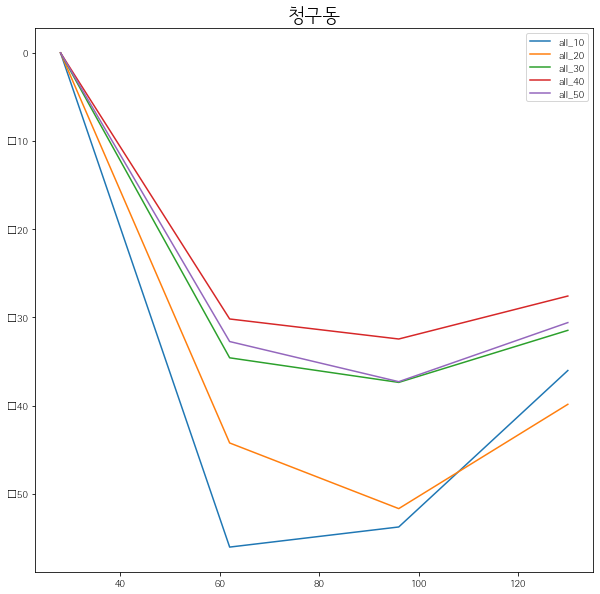

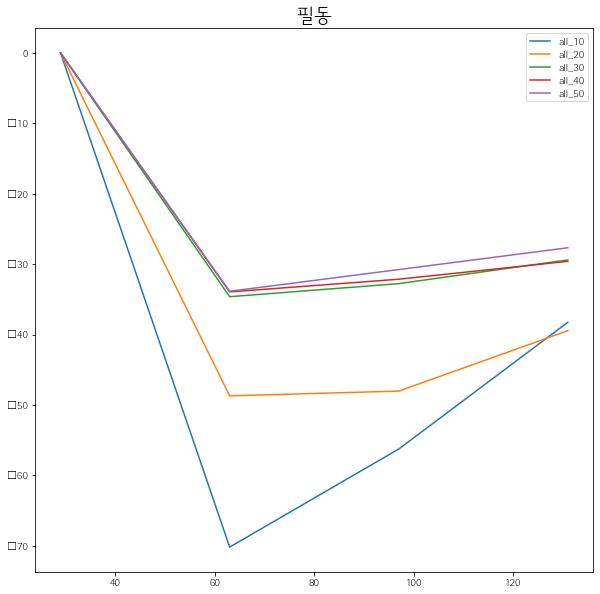

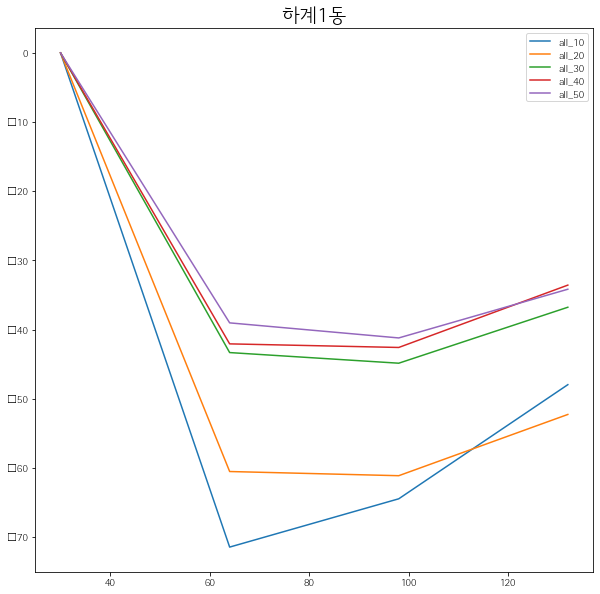

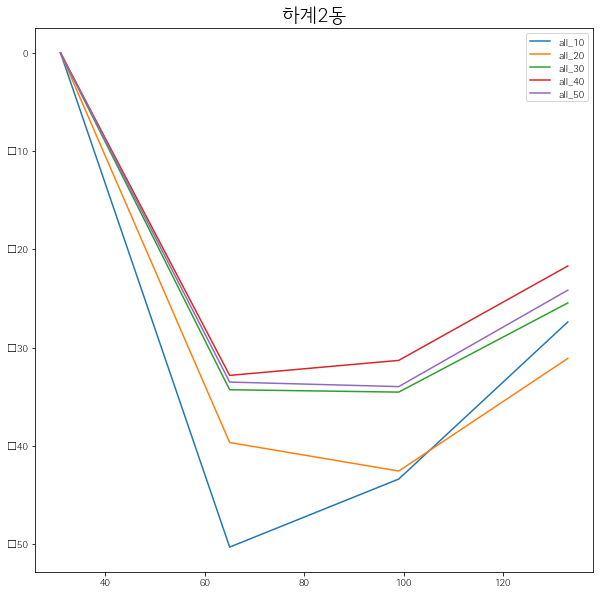

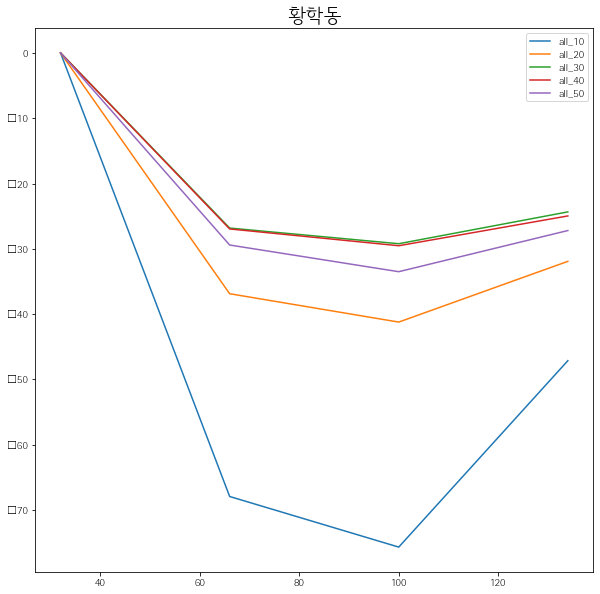

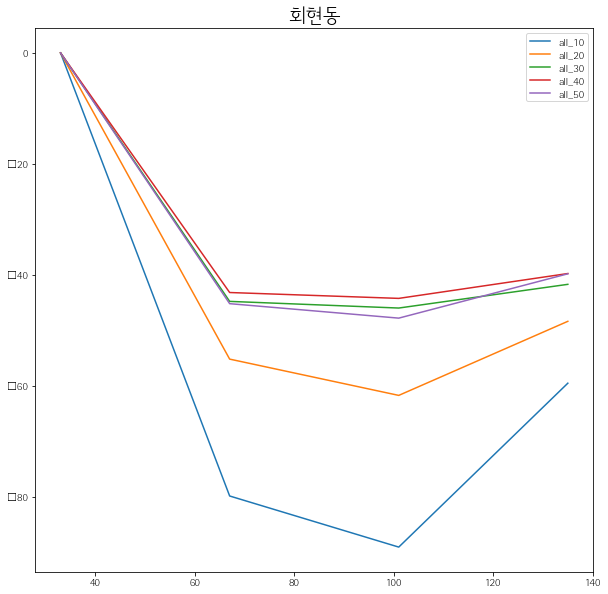

In [63]:
for dong in temp_year['HDONG_NM'].unique():
    temp_year[temp_year['HDONG_NM'] == dong][all_col].plot(figsize=(10,10))
    plt.title(label=dong, fontsize=20)

In [65]:
temp_year[temp_year['SGNG_NM'] == '중구'].groupby('STD_YM')[['all_10', 'all_20', 'all_30', 'all_40', 'all_50']].sum()

,all_10,all_20,all_30,all_40,all_50
STD_YM,,,,,
202002,0.000000,0.000000,0.000000,0.000000,0.000000
202003,-982.947751,-662.813401,-492.730112,-445.448229,-455.093939
202004,-1064.262147,-768.049212,-536.442665,-485.559888,-516.033988
202005,-697.268482,-611.281969,-454.364484,-415.708188,-431.999769


C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


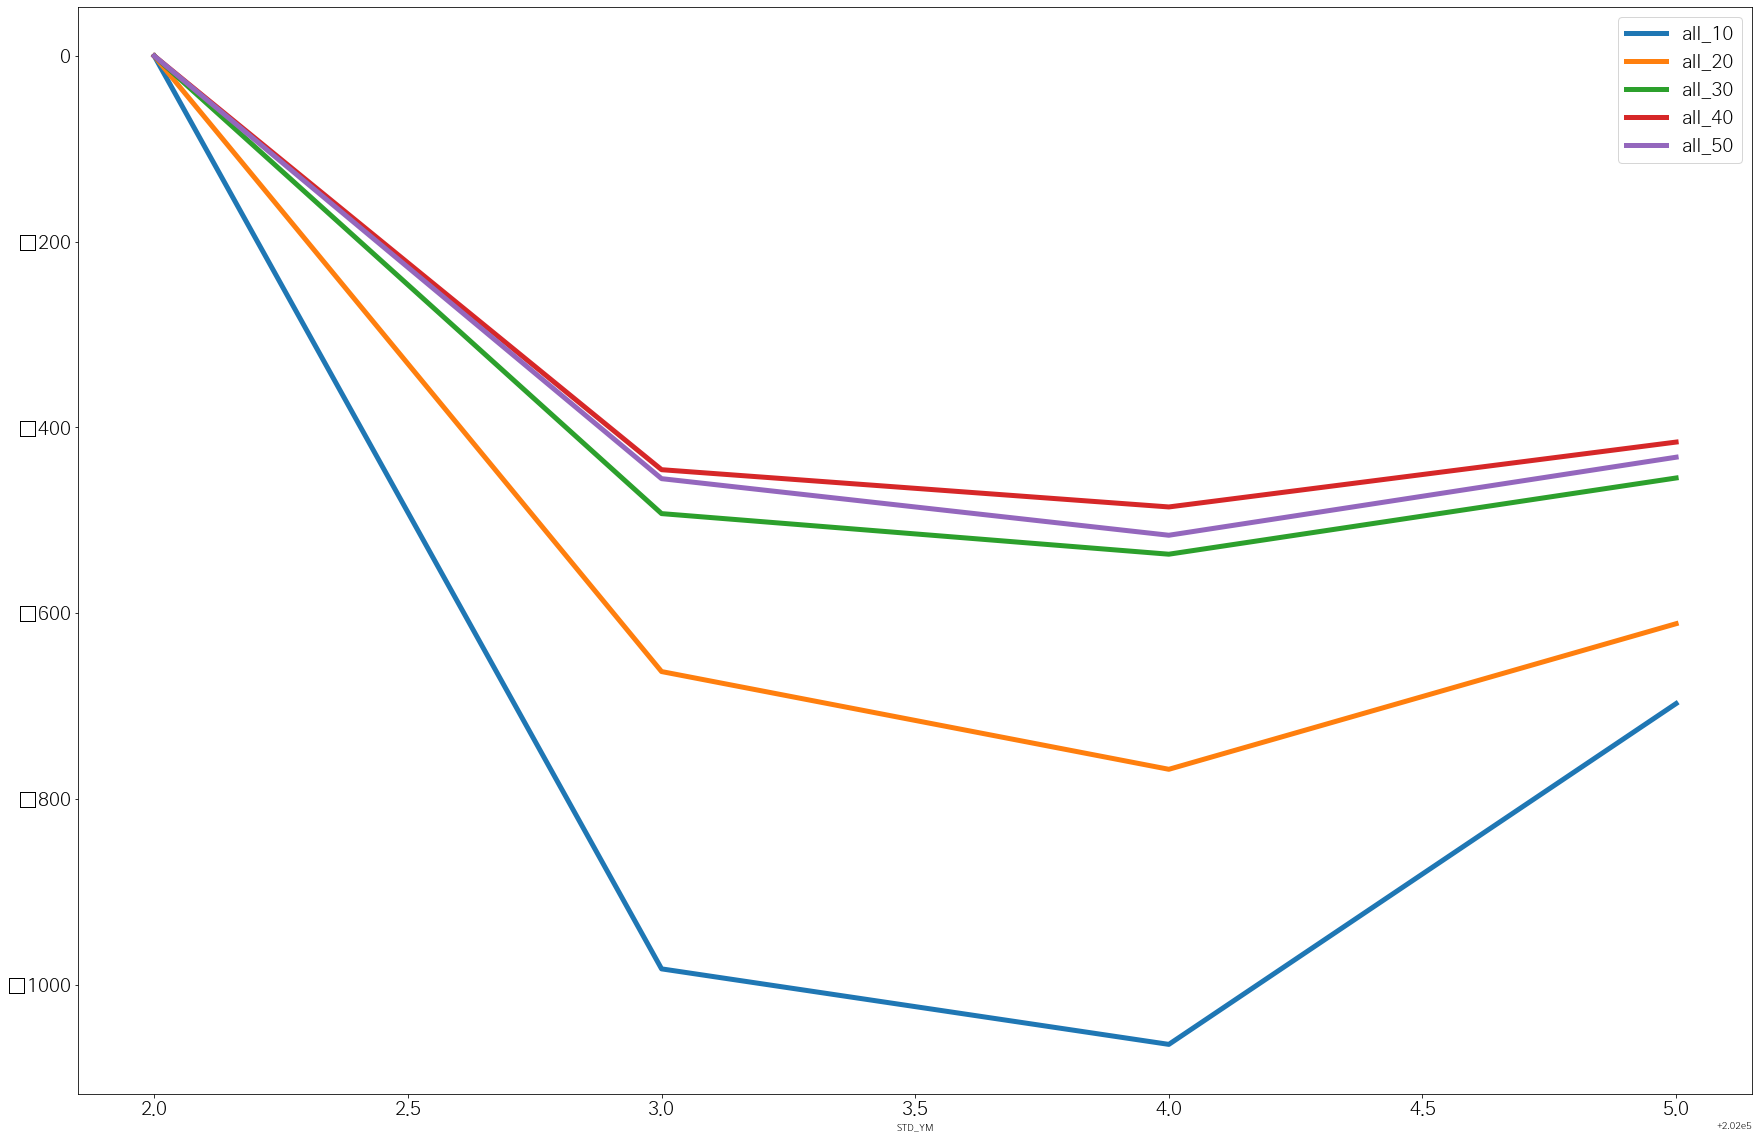

In [66]:
temp_year[temp_year['SGNG_NM'] == '중구'].groupby('STD_YM')[['all_10', 'all_20', 'all_30', 'all_40', 'all_50']].sum().plot(figsize=(30,20), fontsize=20, linewidth=5, )
plt.legend(fontsize=20)

In [67]:
df_1.reset_index(inplace=True)

# 주말데이터 전년대비 비교

In [68]:
a = df_1.groupby(['STD_YM', 'HDONG_NM'])[all_col].sum()

In [69]:
b = df_2.groupby(['STD_YM', 'HDONG_NM'])[all_col].sum()

In [70]:
c = copy.deepcopy(b)

In [80]:
df_2.reset_index(inplace=True)

In [81]:
for month in df_2['STD_YM'].unique():
    for dong in df_2['HDONG_NM'].unique():
        if month == 202002:
            c.loc[month].loc[dong] = (b.loc[month].loc[dong] - a.loc[201902].loc[dong]) / a.loc[201902].loc[dong] * 100
        elif month == 202003:
            c.loc[month].loc[dong] = (b.loc[month].loc[dong] - a.loc[201903].loc[dong]) / a.loc[201903].loc[dong] * 100       
        elif month == 202004:
            c.loc[month].loc[dong] = (b.loc[month].loc[dong] - a.loc[201904].loc[dong]) / a.loc[201904].loc[dong] * 100
        elif month == 202005:
            c.loc[month].loc[dong] = (b.loc[month].loc[dong] - a.loc[201905].loc[dong]) / a.loc[201905].loc[dong] * 100

In [139]:
c.reset_index(inplace=True)

In [149]:
c['HDONG_NM'].unique()

array(['공릉1동', '공릉2동', '광희동', '다산동', '동화동', '명동', '상계10동', '상계1동', '상계2동',
       '상계3.4동', '상계5동', '상계6.7동', '상계8동', '상계9동', '소공동', '신당5동', '신당동',
       '약수동', '월계1동', '월계2동', '월계3동', '을지로동', '장충동', '중계1동', '중계2.3동',
       '중계4동', '중계본동', '중림동', '청구동', '필동', '하계1동', '하계2동', '황학동', '회현동'],
      dtype=object)

In [174]:
c[c['HDONG_NM'] == dong][all_col].index

Int64Index([0, 34, 68, 102], dtype='int64')

# fig, ax?

In [178]:
fig = plt.figure(figsize=(20,50))

<Figure size 1440x3600 with 0 Axes>

In [ ]:
x = np.linspace(0,1,50)

y1 = np.cos(4*np.pi*x)
y2 = np.cos(4*np.pi*x)*np.exp(-2*x)

plt.subplot(2,1,1)
plt.plot(x,y1,'r-*',lw=1)
plt.grid(True)  
plt.ylabel(r'$sin(4 \pi x)$')
plt.axis([0,1,-1.5,1.5])

plt.subplot(2,1,2)
plt.plot(x,y2,'b--o',lw=1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel(r'$ e^{-2x} sin(4\pi x) $')
plt.axis([0,1,-1.5,1.5])

plt.tight_layout()
plt.show()

In [189]:
c['HDONG_NM']

0      공릉1동
1      공릉2동
2       광희동
3       다산동
4       동화동
       ... 
131      필동
132    하계1동
133    하계2동
134     황학동
135     회현동
Name: HDONG_NM, Length: 136, dtype: object

In [192]:
test = copy.deepcopy(c)

In [200]:
c

,STD_YM,HDONG_NM,all_10,all_20,all_30,all_40,all_50
0,202002,공릉1동,-24.393350,-12.635380,-16.460943,-13.257091,-12.126429
1,202002,공릉2동,-34.979992,-2.910967,-22.358557,-20.196832,-14.802763
2,202002,광희동,-64.174214,-27.948621,-31.648976,-33.884666,-24.723931
3,202002,다산동,62.138078,18.908167,21.443550,27.967362,25.166881
4,202002,동화동,35.707587,53.858602,43.954632,40.924788,47.716180
...,...,...,...,...,...,...,...
131,202005,필동,-59.833044,-26.613575,-23.339736,-30.202279,-23.761840
132,202005,하계1동,-23.584421,-22.224897,-12.415919,-9.803457,-4.062632
133,202005,하계2동,-13.398855,-1.326841,1.558018,1.550594,4.515480
134,202005,황학동,-48.489868,-12.645836,-6.329531,-12.655981,-7.656102


In [ ]:
c[c['HDONG_NM'] == '공릉2동'][all_col].plot(figsize=(10,10), kind='bar', width=0.9)

In [219]:
c.reset_index().set_index(['SGNG_NM', 'HDONG_NM', 'STD_YM']).drop('SIDO_NM', inplace=True, axis=1)

In [224]:
test = c.reset_index().set_index(['SGNG_NM', 'HDONG_NM', 'STD_YM'])

In [226]:
test.drop('SIDO_NM', axis=1, inplace=True)

In [228]:
import pickle

In [229]:
test.to_pickle('전년대비 주말 데이터.pkl')

C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


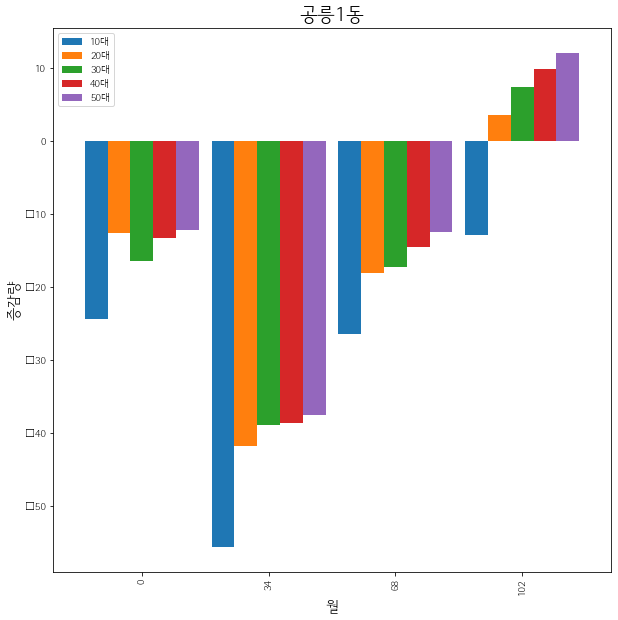

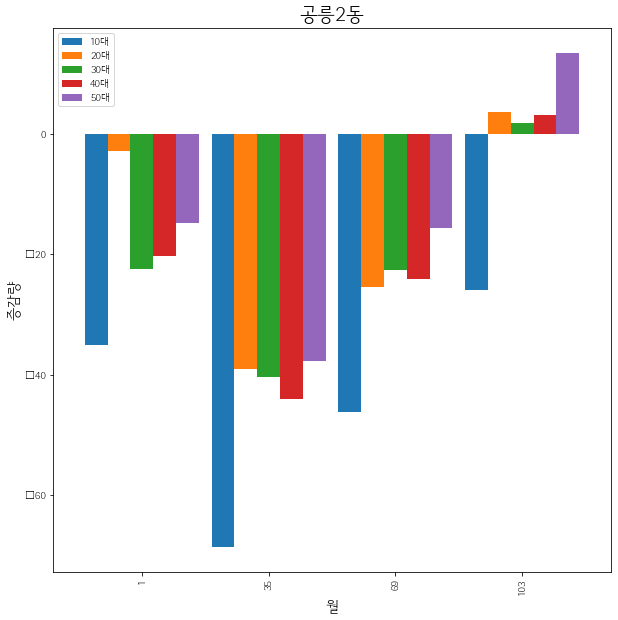

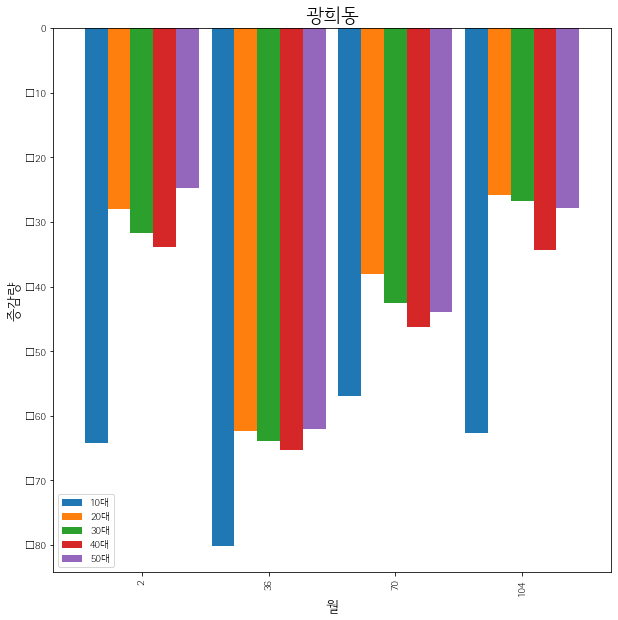

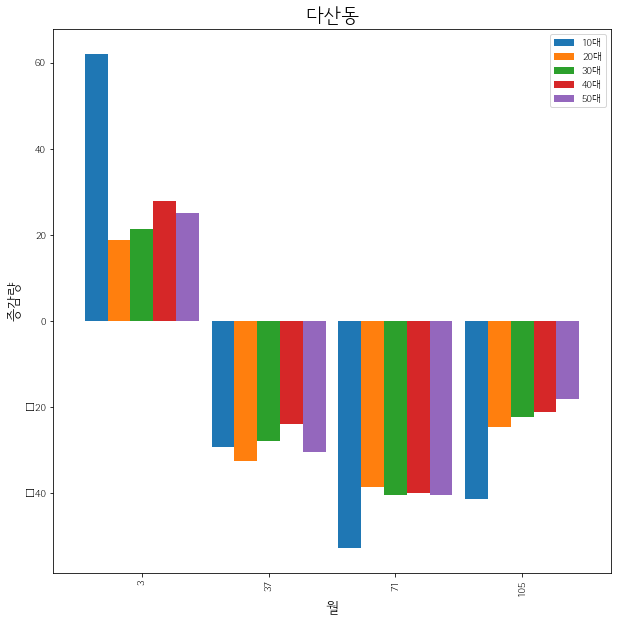

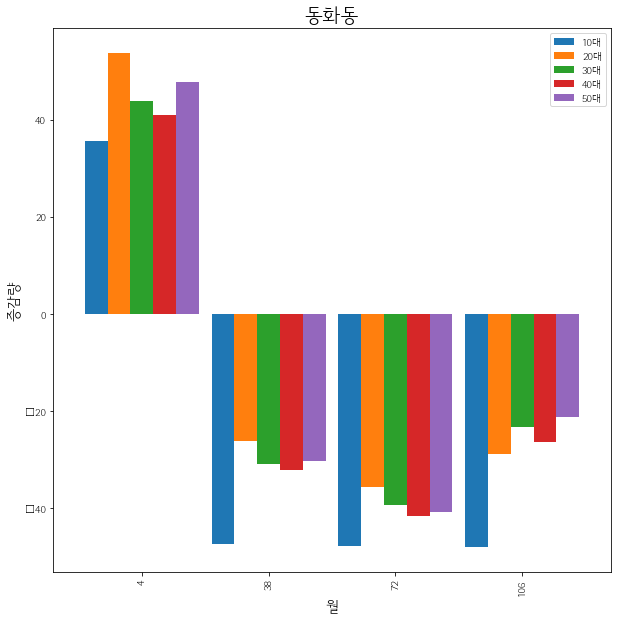

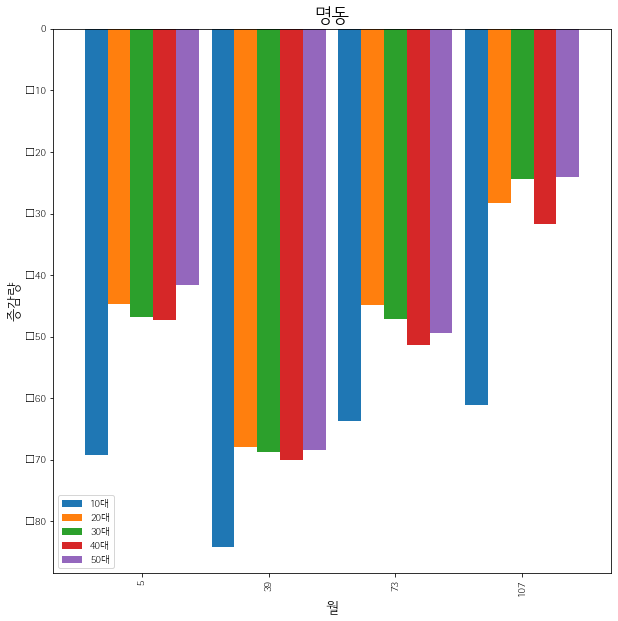

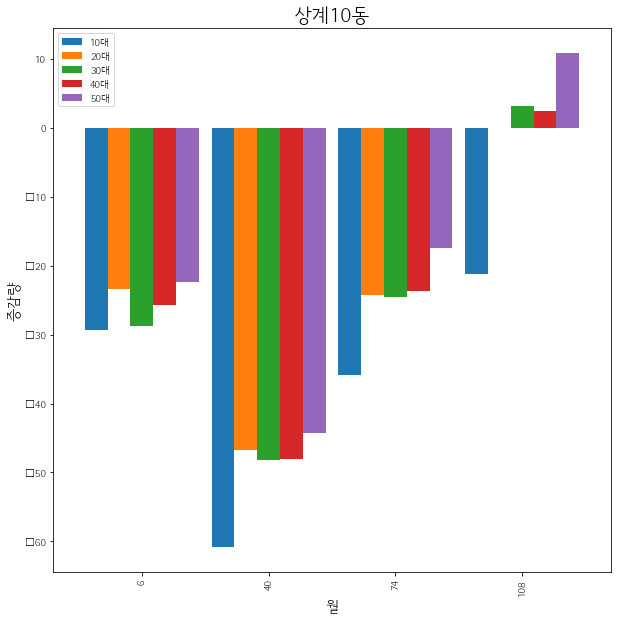

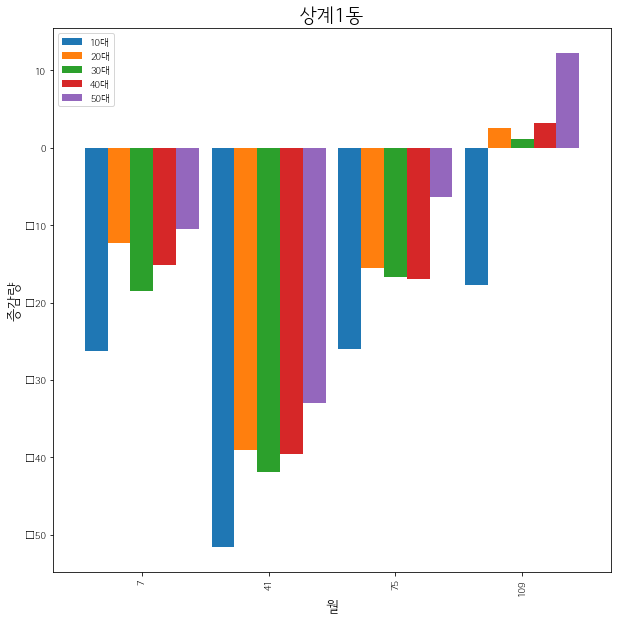

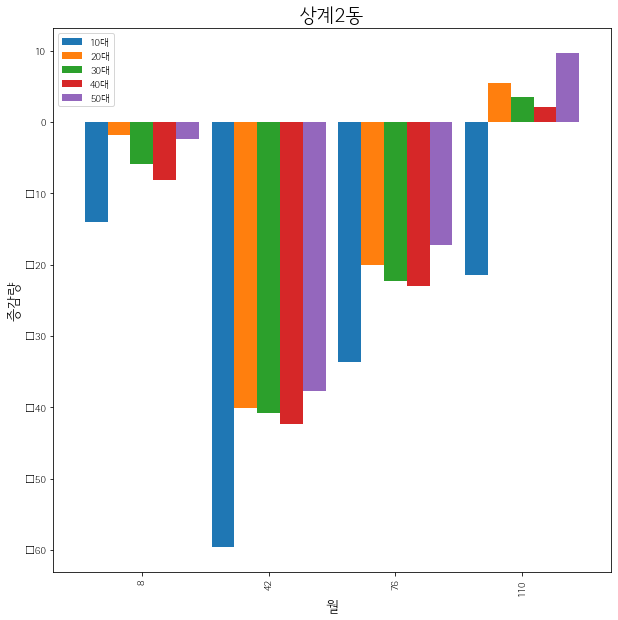

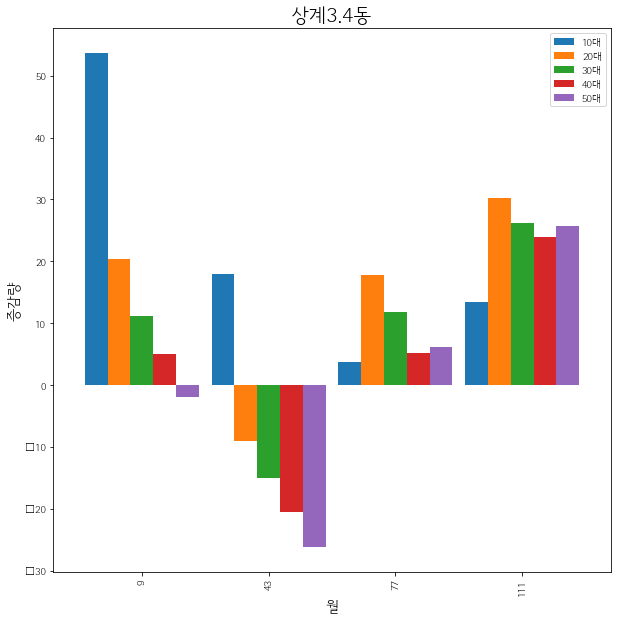

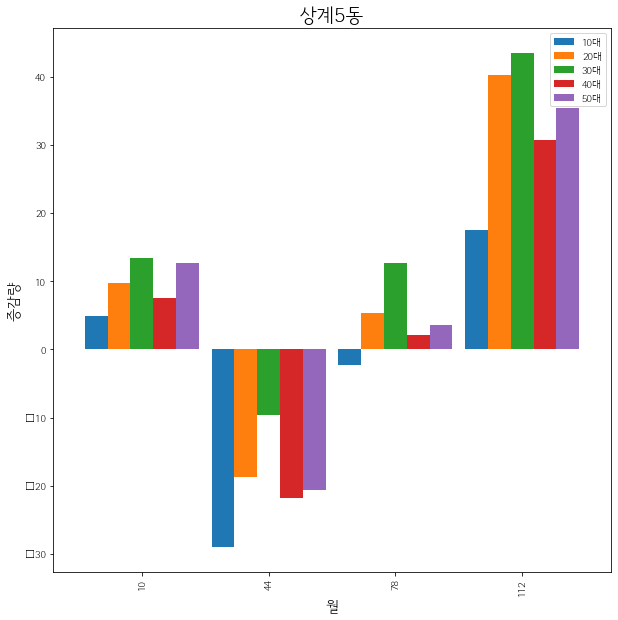

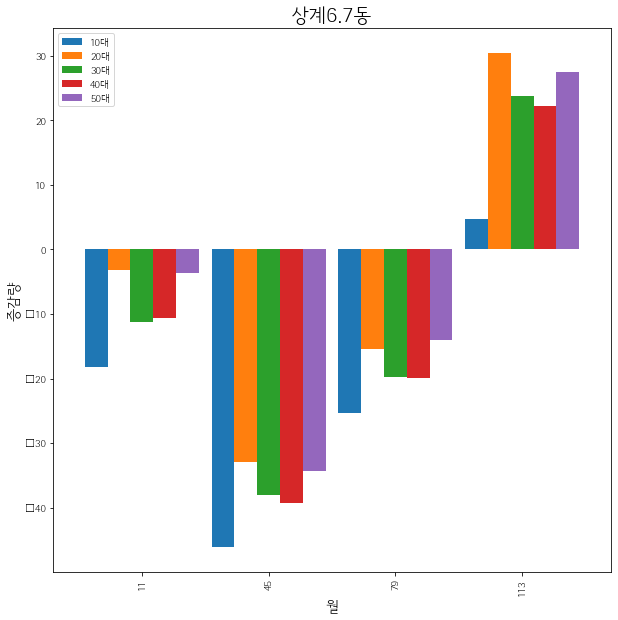

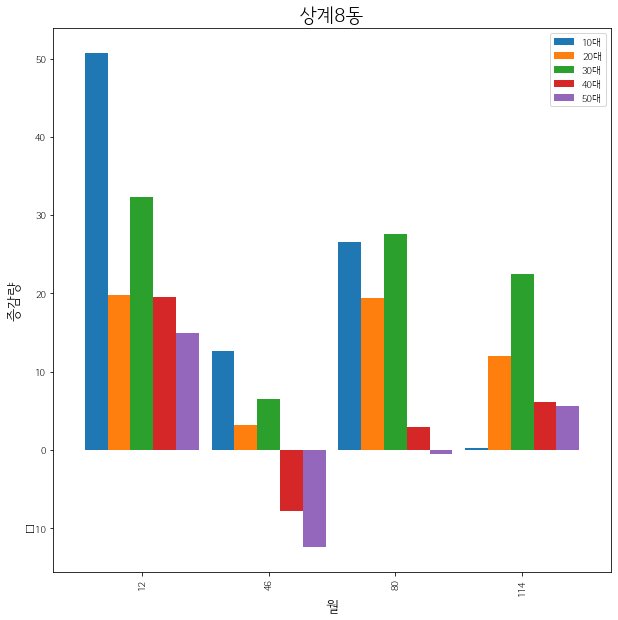

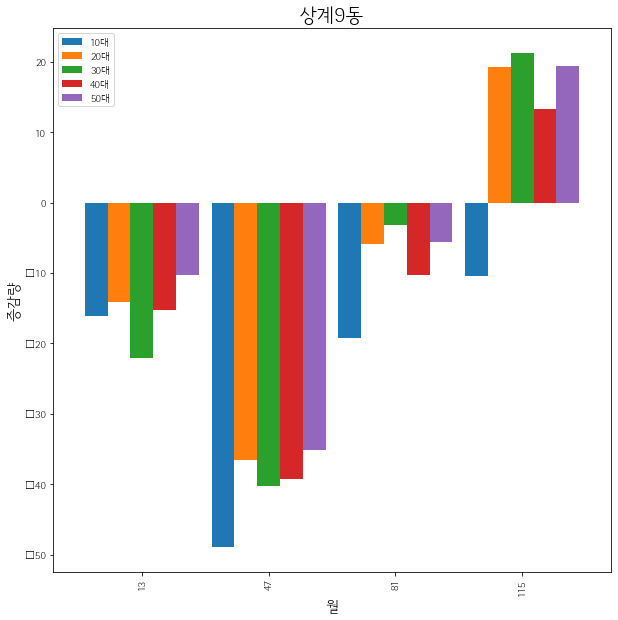

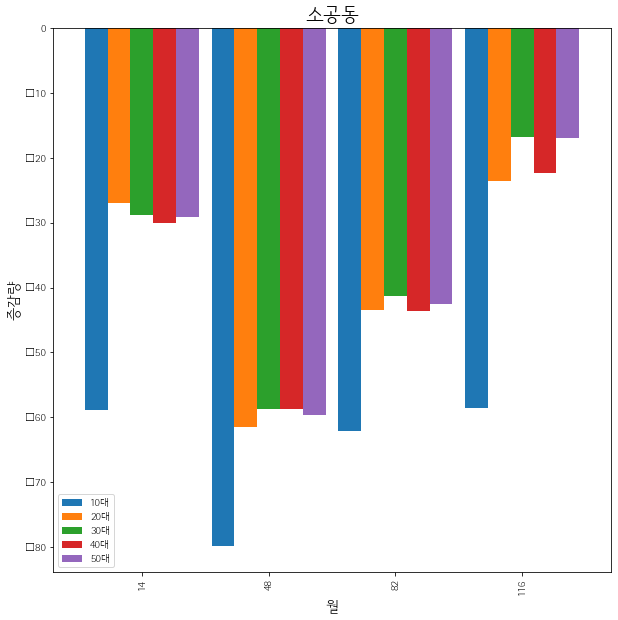

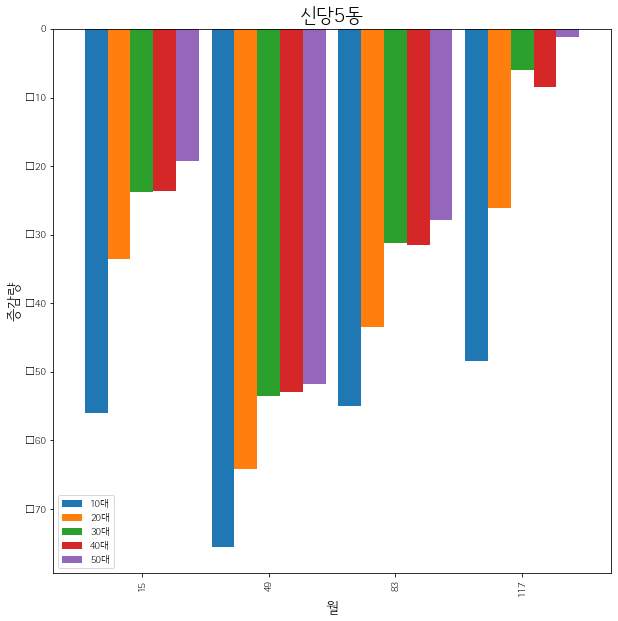

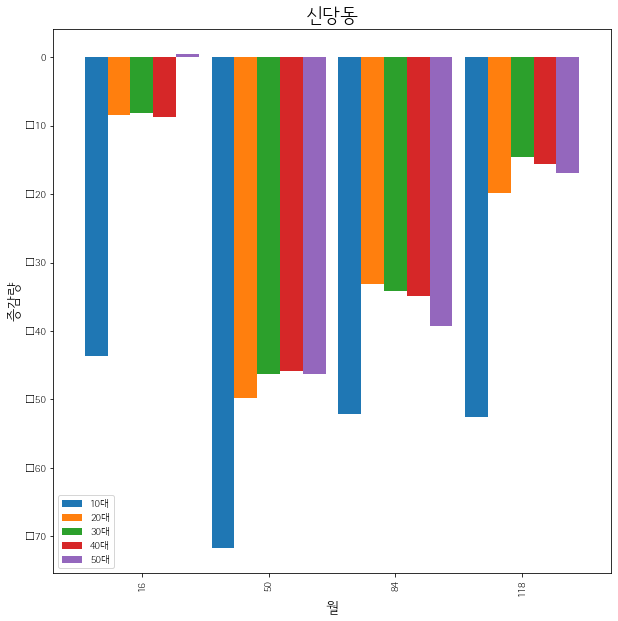

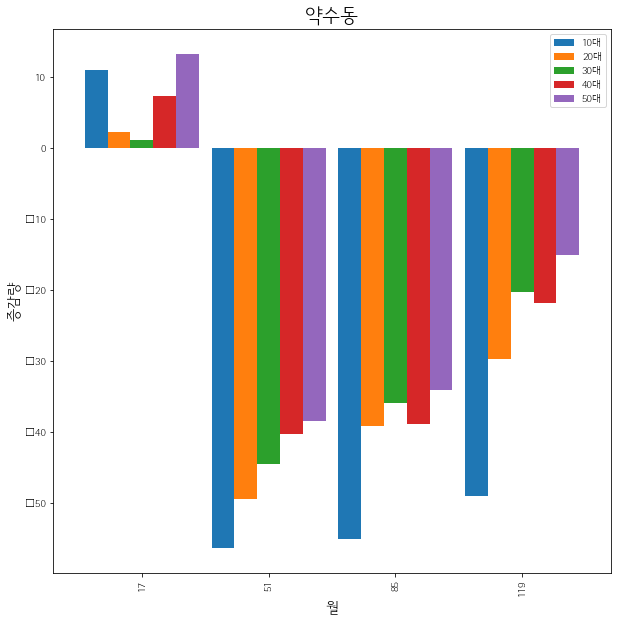

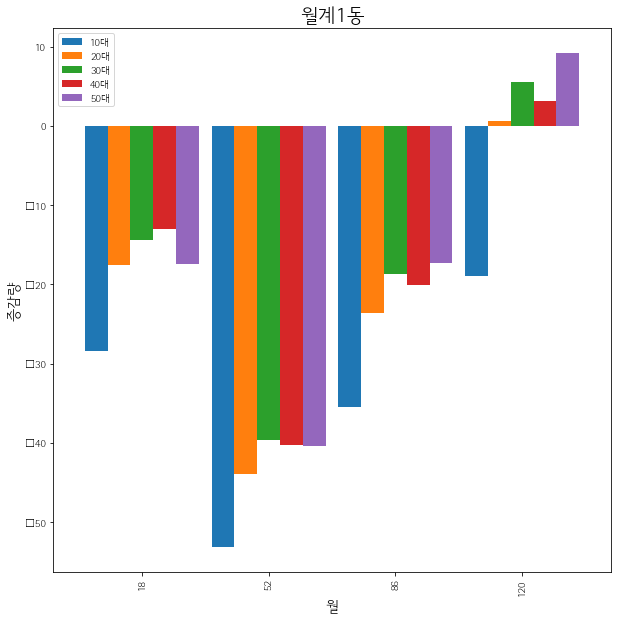

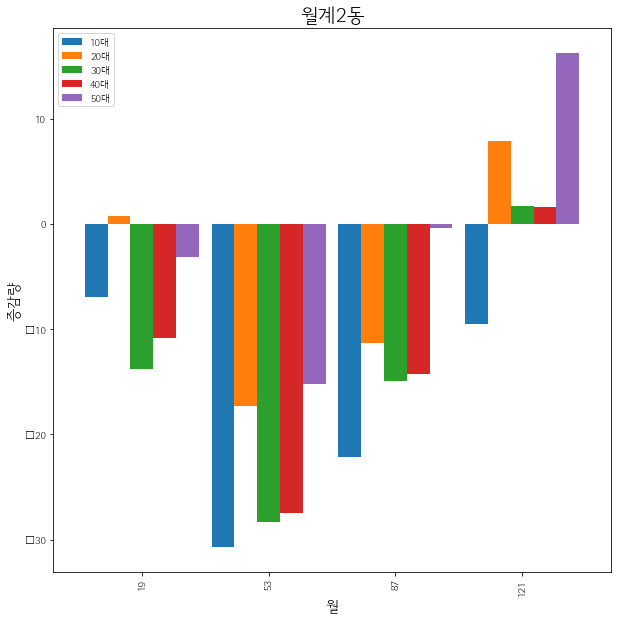

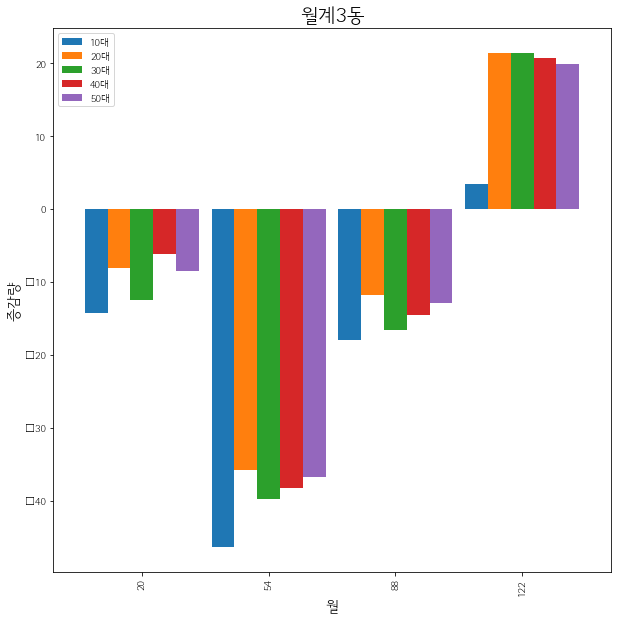

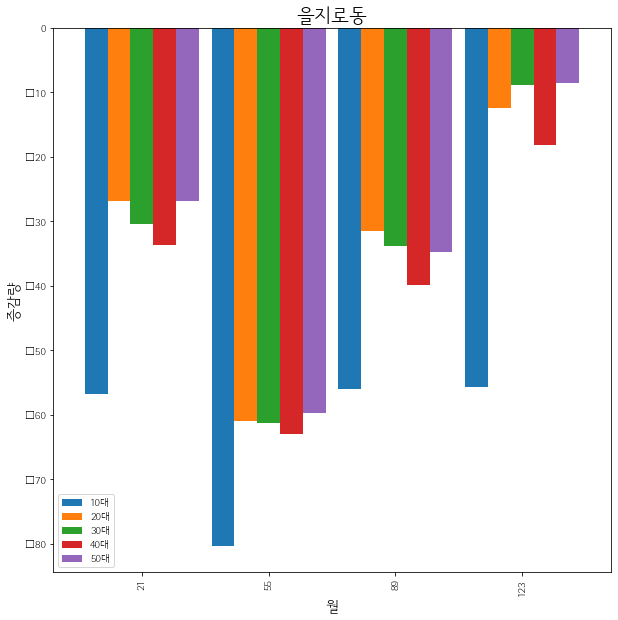

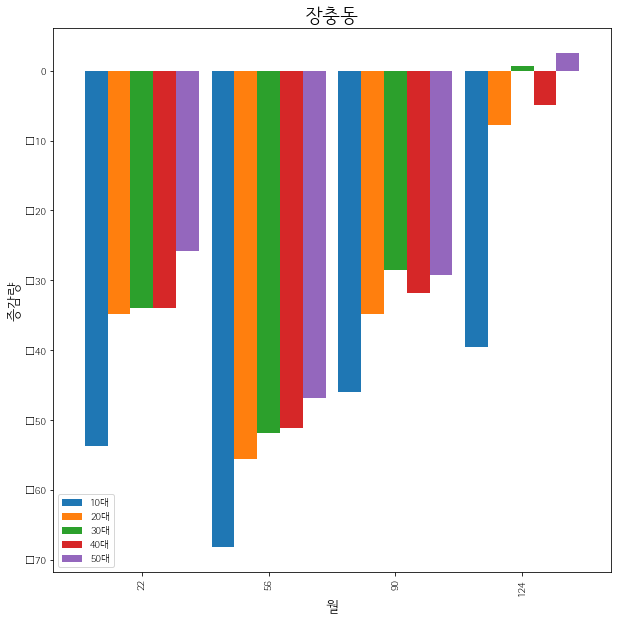

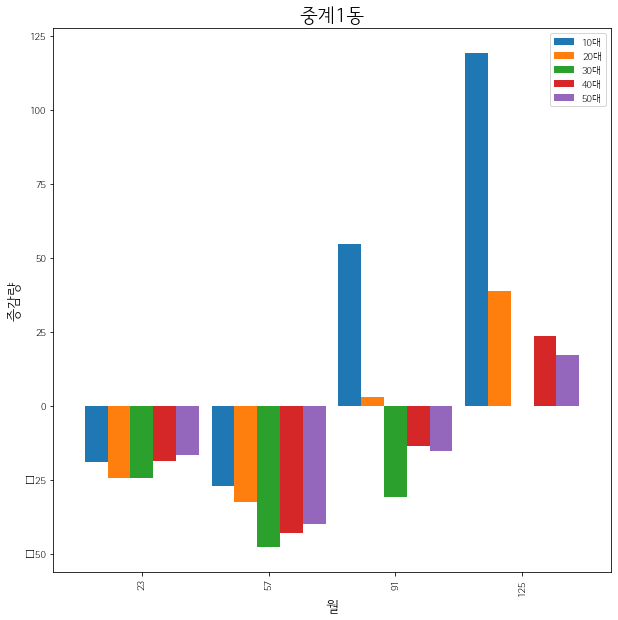

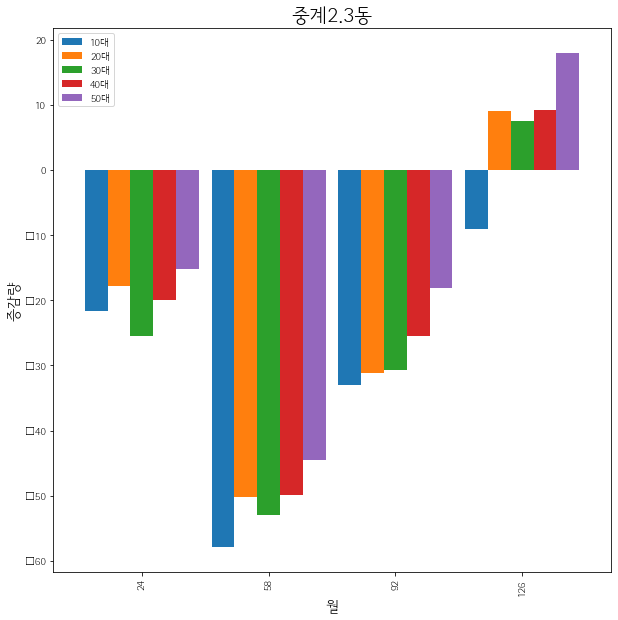

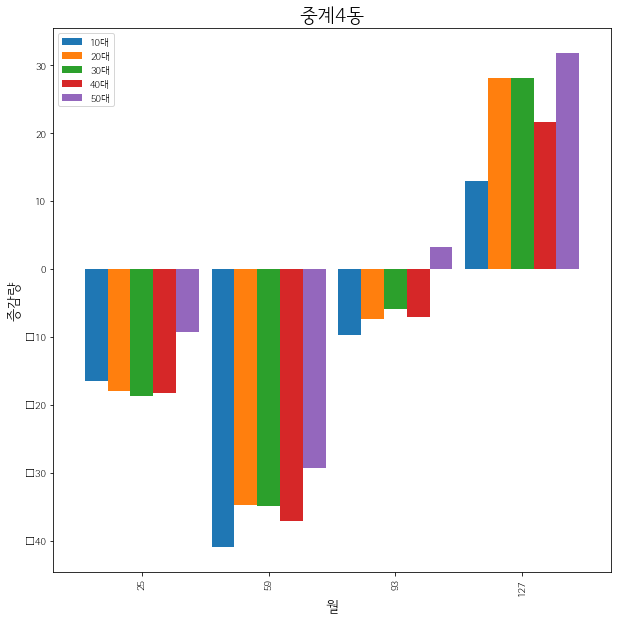

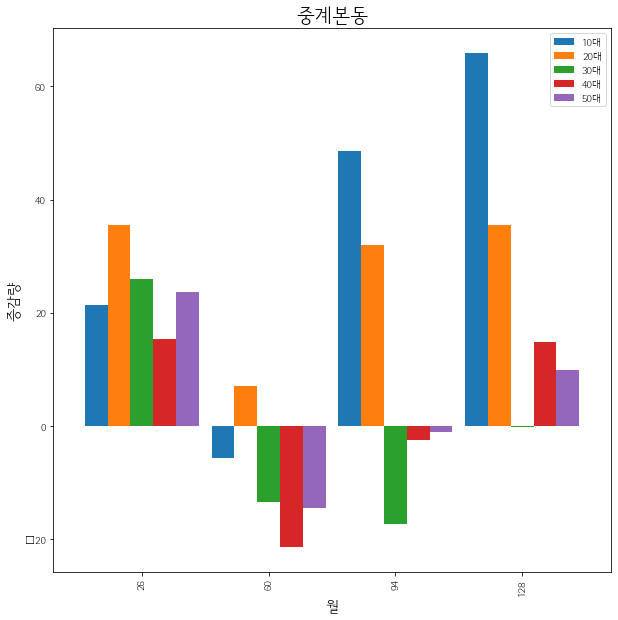

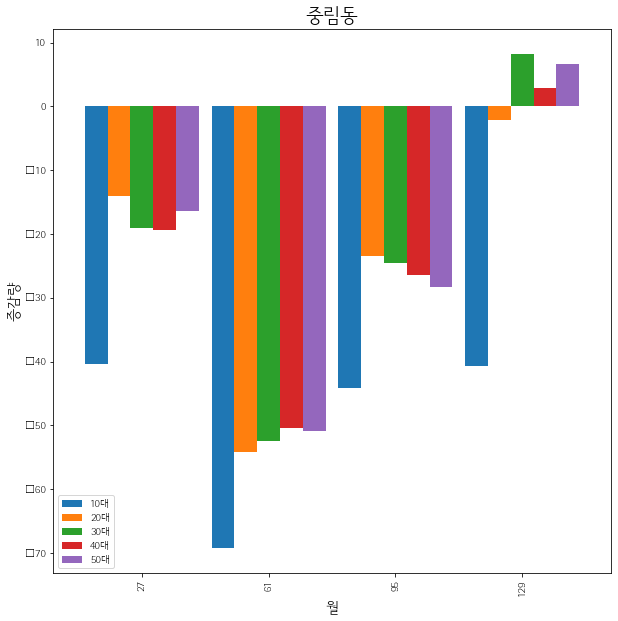

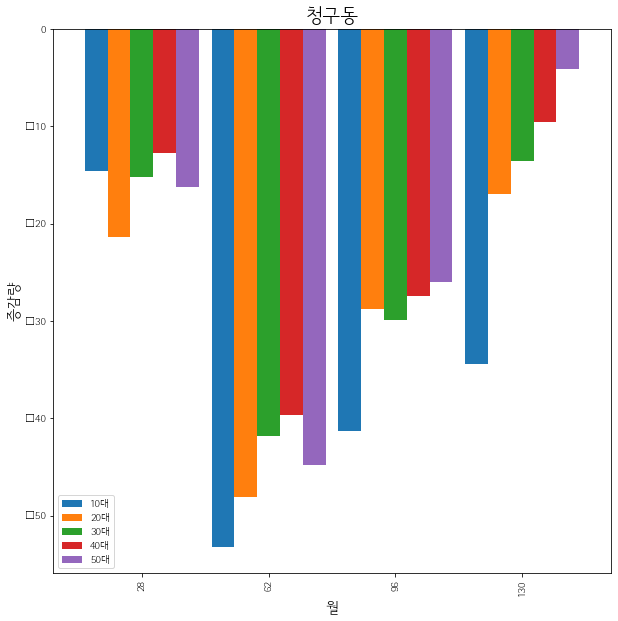

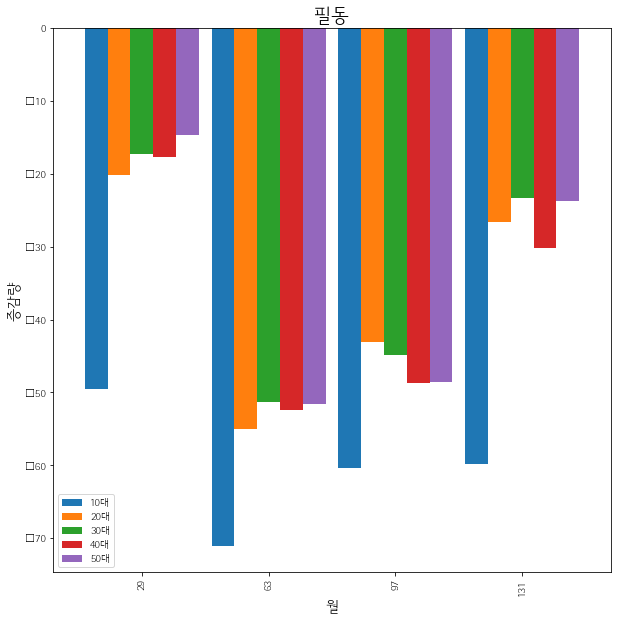

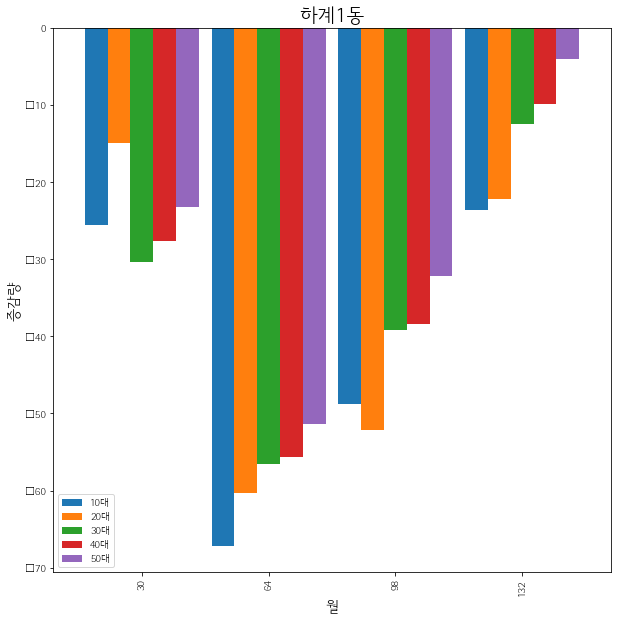

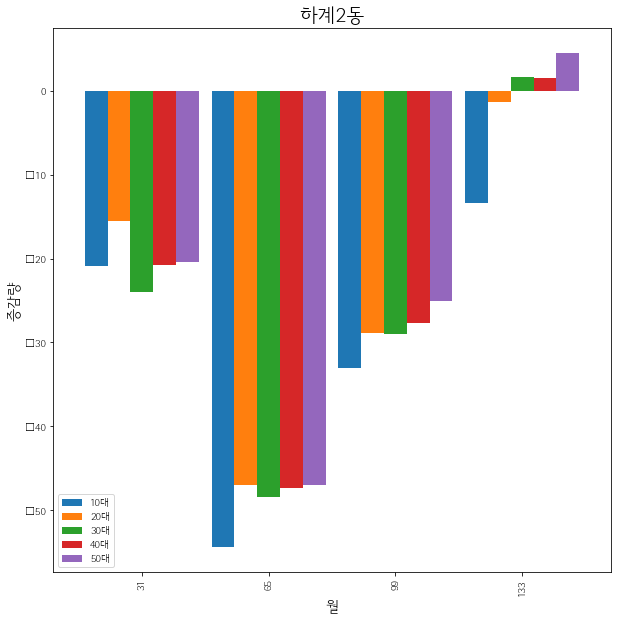

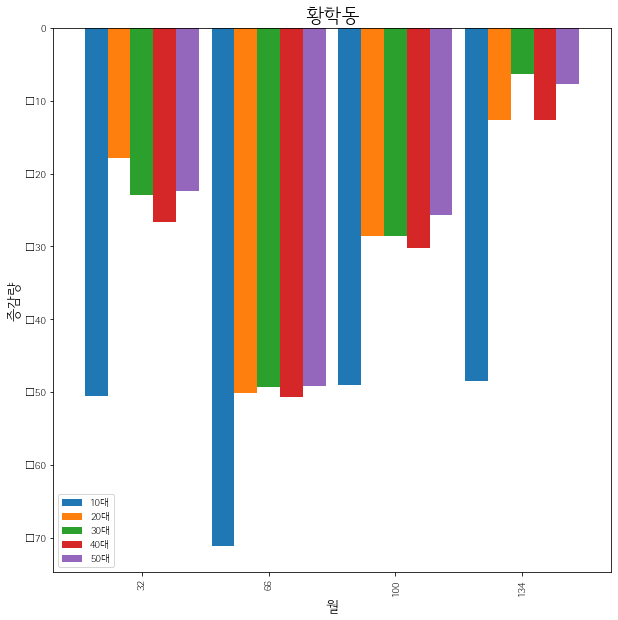

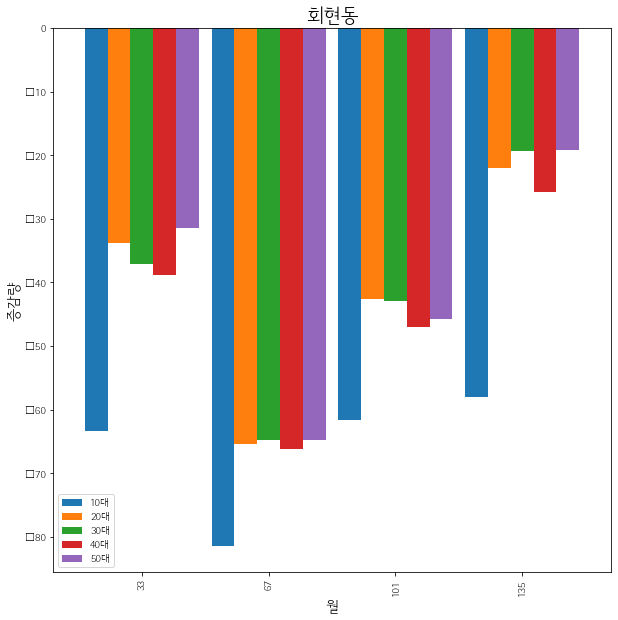

In [208]:
for i,dong in enumerate(c['HDONG_NM'].unique()):
    c[c['HDONG_NM'] == dong][all_col].plot(figsize=(10,10), kind='bar', width=0.9)
    
    plt.title(label=dong, fontsize=20)
    plt.xlabel('월', fontsize=15)
    plt.ylabel('증감량', fontsize=15)
#     plt.xticks(labels=['2월', '3월', '4월', '5월'])
    plt.legend(labels=['10대', '20대', '30대', '40대', '50대'])